In [3]:
suppressMessages(suppressWarnings(library(karyoploteR)))
suppressMessages(suppressWarnings(library(rtracklayer)))
suppressMessages(suppressWarnings(library(readr)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(tibble)))
suppressMessages(suppressWarnings(library(pheatmap)))
suppressMessages(suppressWarnings(library(viridis)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(forcats)))
suppressMessages(suppressWarnings(library(stringr)))
suppressMessages(suppressWarnings(library(RColorBrewer)))
suppressMessages(suppressWarnings(library(UpSetR)))
suppressMessages(suppressWarnings(library(scales)))
suppressMessages(suppressWarnings(library(gridExtra)))


In [4]:
# inputs

fai_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/resources/genome/Rhodnius_prolixus-3.0.3_HiC.fasta.fai"


cluster_files <- c(
    "pvs" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/pvs.clusters.nomir.bed",
    "egg" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/egg.clusters.nomir.bed",
    "emb" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/emb.clusters.nomir.bed",
    "nym" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/nym.clusters.nomir.bed"
)

all_clusters_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.bed"

clusters_final_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.final.tsv"

clusters_count_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.counts.tsv"

scalling_factors_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/bamCoverage_dir/scallingFactors.tsv"

clusters_TEs_files <- c(
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL10.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL1.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL2.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL3.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL4.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL5.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL6.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL7.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL8.TEs.count.tsv",
    "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/TEs/RPCL9.TEs.count.tsv"
)

cluster_pos_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.pos.counts.tsv"
cluster_neg_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.neg.counts.tsv"

cluster_te_strand_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.te.strand.count.tsv"

## Karyoplot

In [5]:
fai <- read_tsv(fai_file, 
                col_names = FALSE)
fai <- fai %>%  mutate(s=(0*X2)+1) %>% select(X1,s,X2)

custom_genome <- toGRanges(fai %>% as.data.frame)
custom_genome[c(1:11),]

Rows: 17755 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (4): X2, X3, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


GRanges object with 11 ranges and 0 metadata columns:
            seqnames     ranges strand
               <Rle>  <IRanges>  <Rle>
   1  HiC_scaffold_1 1-47232656      *
   2  HiC_scaffold_2 1-45634076      *
   3  HiC_scaffold_3 1-48117738      *
   4  HiC_scaffold_4 1-38674490      *
   5  HiC_scaffold_5 1-45773795      *
   6  HiC_scaffold_6 1-69096158      *
   7  HiC_scaffold_7 1-56613900      *
   8  HiC_scaffold_8 1-64323523      *
   9  HiC_scaffold_9 1-45655803      *
  10 HiC_scaffold_10 1-45755482      *
  11 HiC_scaffold_11 1-55035022      *
  -------
  seqinfo: 17755 sequences from an unspecified genome; no seqlengths

In [6]:
options(repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 150)

clusters <- lapply(cluster_files, import)

plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100


u <- 0.25

bg <- 0 + (4 * u)
p <- 0 + (3 * u) 
g <- 0 + (2 * u)
m <- 0 + (1 * u)
n <- 0 + (0 * u)

png("images/karyoplot_stages.png", width=1100, height = 600)
kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params, cex=1.2)
kpDataBackground(kp, color = "white")
kpAbline(kp, h=p+u)
kpPlotRegions(kp, data=clusters[["pvs"]], r0=p, r1=p+u, col = "#C77CFF")
kpAbline(kp, h=p)
kpPlotRegions(kp, data=clusters[["egg"]], r0=g, r1=g+u, col = "#00B0F6")
kpAbline(kp, h=g)
kpPlotRegions(kp, data=clusters[["emb"]], r0=m, r1=m+u, col = "#5d8201")
kpAbline(kp, h=m)
kpPlotRegions(kp, data=clusters[["nym"]], r0=n, r1=n+u, col = "#F8766D")
kpAbline(kp, h=n)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1.2,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")


dev.off()


png 
  2

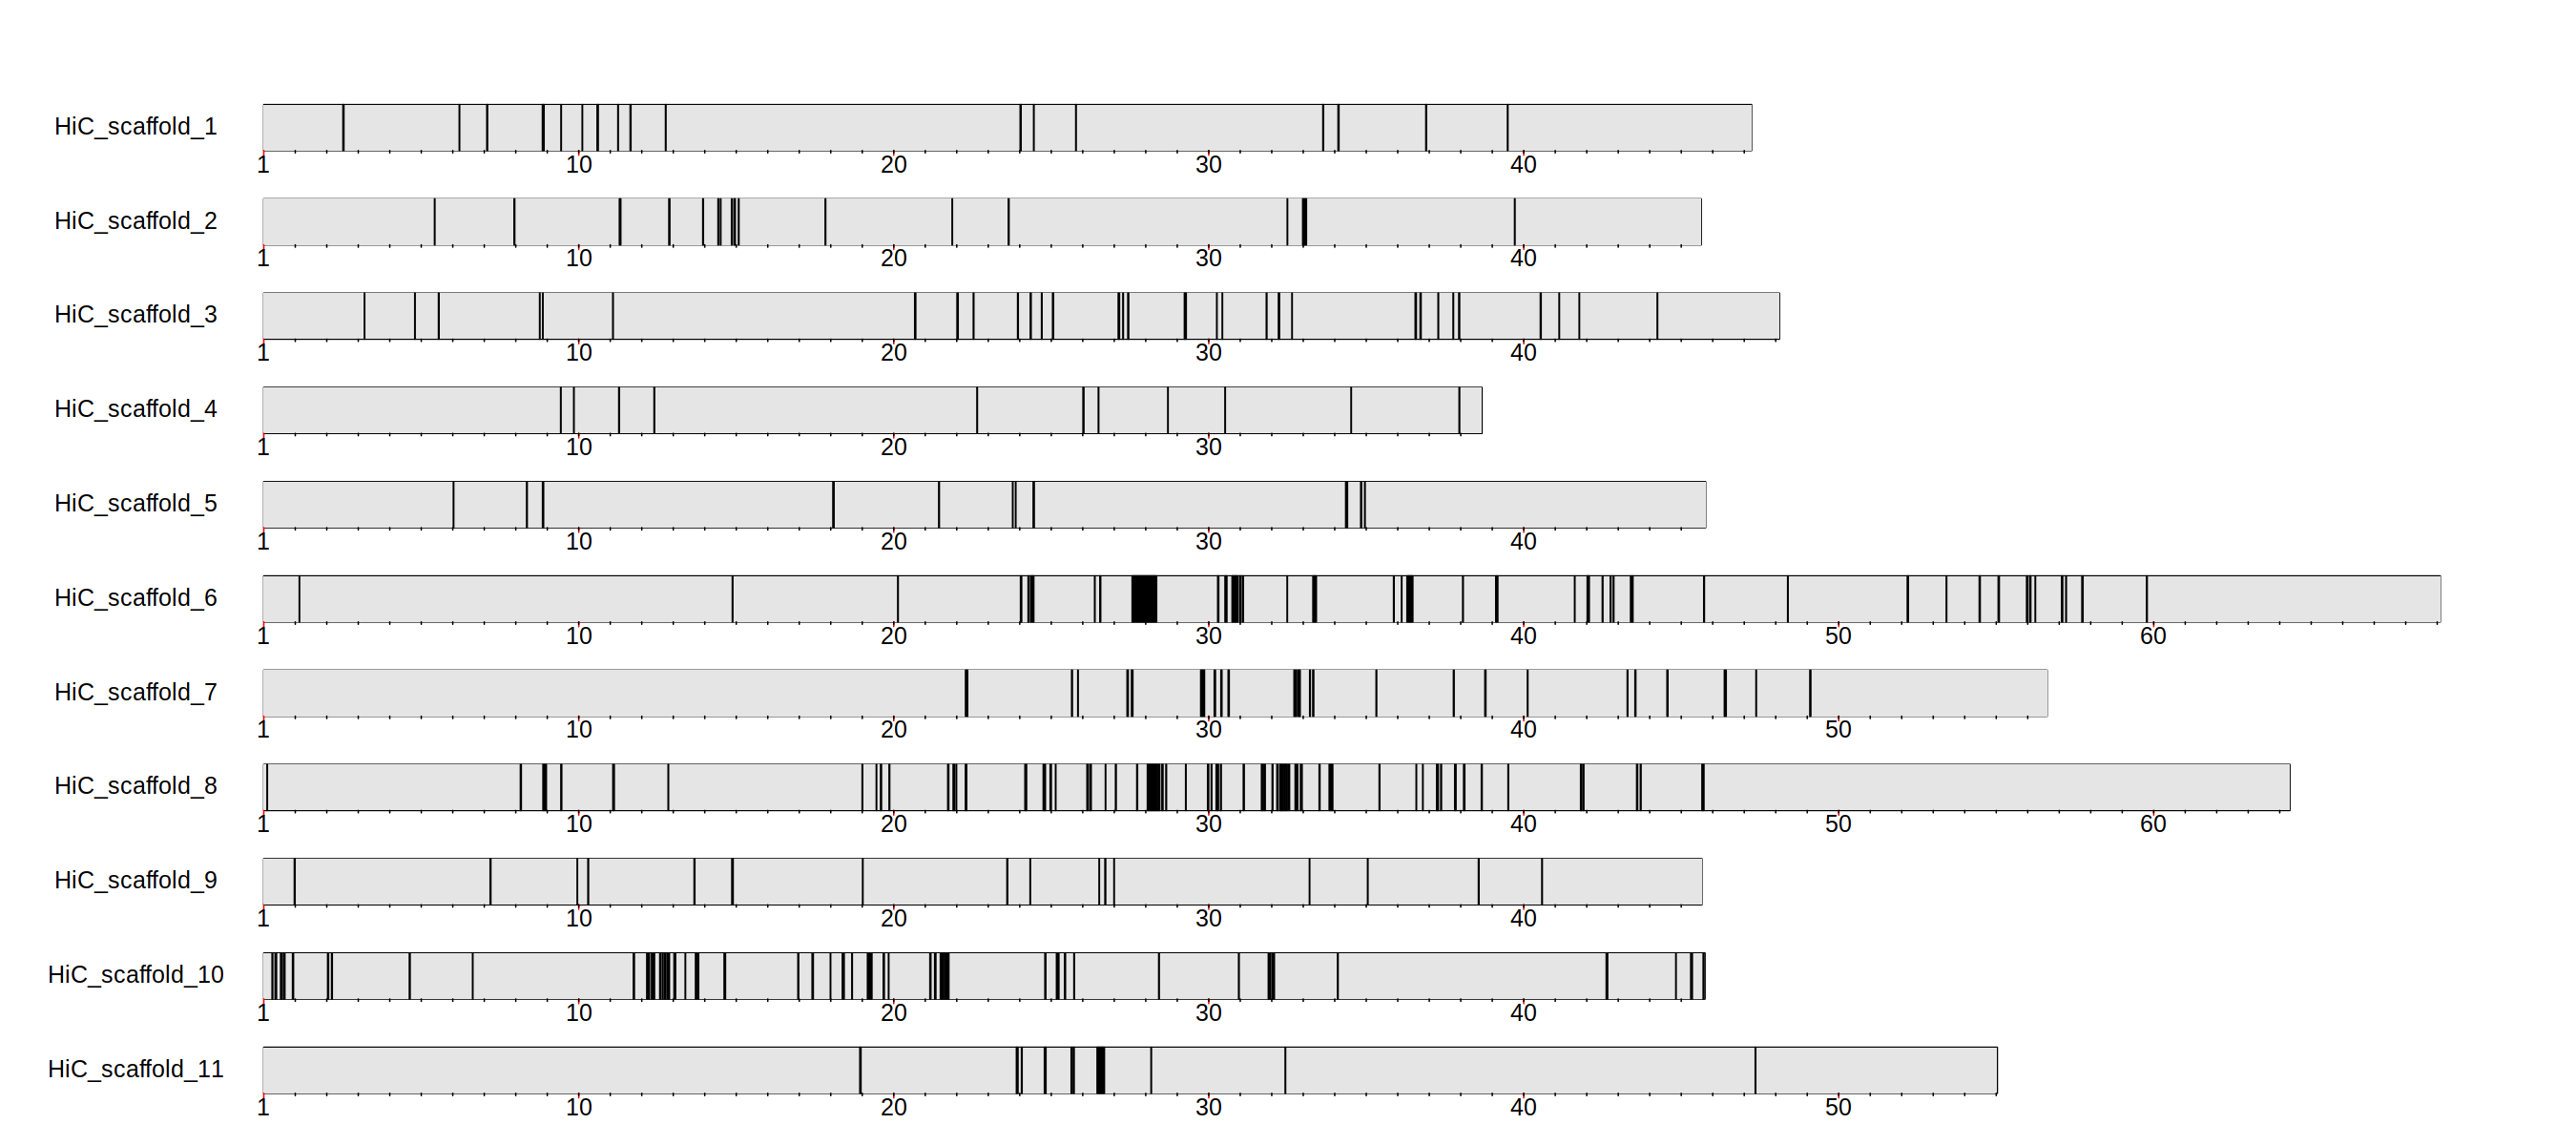

In [7]:
all_clusters <- import(all_clusters_file)

all_clusters <- all_clusters %>% 
    as.data.frame %>% 
    filter(as.numeric(name) > 10000) %>% 
    makeGRangesFromDataFrame


plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100

kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params)
kpDataBackground(kp, color = "grey90")
kpPlotRegions(kp, data=all_clusters)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")
# dev.off()

## Heatmaps

In [8]:
clusters_final <- suppressMessages(read_tsv(clusters_final_file))
head(clusters_final)
# clusters_final %>% filter(name %in% clusters_0)

chr,start,end,length,name,mean_rpm,type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
HiC_scaffold_6,27568000,28344000,776000,RPCL1,25313.7598,uni:neg
HiC_scaffold_11,26455000,26688000,233000,RPCL2,20782.1687,dual
HiC_scaffold_6,36293000,36479000,186000,RPCL3,302.7587,dual
HiC_scaffold_6,30741000,30916000,175000,RPCL4,274.1347,dual
HiC_scaffold_10,19165000,19307000,142000,RPCL5,2571.9889,dual
HiC_scaffold_10,21613000,21749000,136000,RPCL6,4516.4210,uni:pos


In [9]:
# ggplot(clusters_final, aes(y = log10(length), x = 1)) + geom_violin()

In [10]:
counts <- suppressMessages(read_tsv(clusters_count_file))
names(counts) <- gsub("\'|#|.sorted.uniquely.bam", "", names(counts))
clusters <- left_join(counts, clusters_final, by = c("chr", "start", "end"))

clusters_norm <- clusters
scale_factors <- suppressMessages(read_tsv(scalling_factors_file))
for(i in 1:length(scale_factors$sample)){
    sample <- scale_factors$sample[i]
    sf <- as.numeric(scale_factors[i,2])
    # print(clusters[sample])
    snorm <- sapply(clusters[sample], function(x) {x * sf})
    clusters_norm[sample] <- snorm
}


In [11]:
clusters_norm$length <- as.numeric(clusters_norm$length)

cl_norm_mat <- clusters_norm %>% 
    arrange(desc(length)) %>% 
    select(name, pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2) %>% 
    as.data.frame %>% 
    column_to_rownames("name")
cl_norm_mat[c(1:10),]


,pvs1,pvs2,egg1,egg2,emb1,emb2,nym1,nym2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPCL1,5646.217217,9127.14988,5160.90726,50654.4094,54141.8387,58293.5068,13191.736739,6294.312566
RPCL2,4672.750051,6816.95172,7309.17925,44537.4005,35331.1492,36823.2692,21006.563456,9760.086251
RPCL3,109.269469,165.27760,98.92073,688.5115,600.0840,695.2735,40.232931,24.499513
RPCL4,107.385513,161.24363,53.03974,516.4816,633.4155,687.6939,21.196890,12.620961
RPCL5,557.920220,1091.01655,559.79156,5876.2652,5626.1290,6679.8710,123.751420,61.166292
RPCL6,726.130609,1593.64947,707.73880,8215.4790,11773.9360,12772.2927,226.820438,115.320939
RPCL7,9.688918,18.90204,18.98150,121.6462,122.2646,137.2705,3.807208,2.103494
RPCL8,1802.138829,2363.56185,2966.75428,15876.0515,14676.2599,15135.1695,13563.917077,6014.589171
RPCL9,34.449488,43.45164,28.96035,193.7909,208.4696,234.2285,8.540494,4.825662


In [12]:
# clusters_norm[rowMeans(clusters_norm) == 0,]

In [13]:

# clusters_0 <- cl_norm_mat %>% 
#     rownames_to_column("cluster") %>% 
#     pivot_longer(cols = all_of(samples), names_to = "sample", values_to = "counts") %>% 
#     group_by(cluster) %>% 
#     summarize(mean=mean(counts)) %>% 
#     filter(mean == 0) %>% 
#     select(cluster) %>% 
#     pull

# clusters_final %>% filter(name %in% clusters_0)

png 
  2

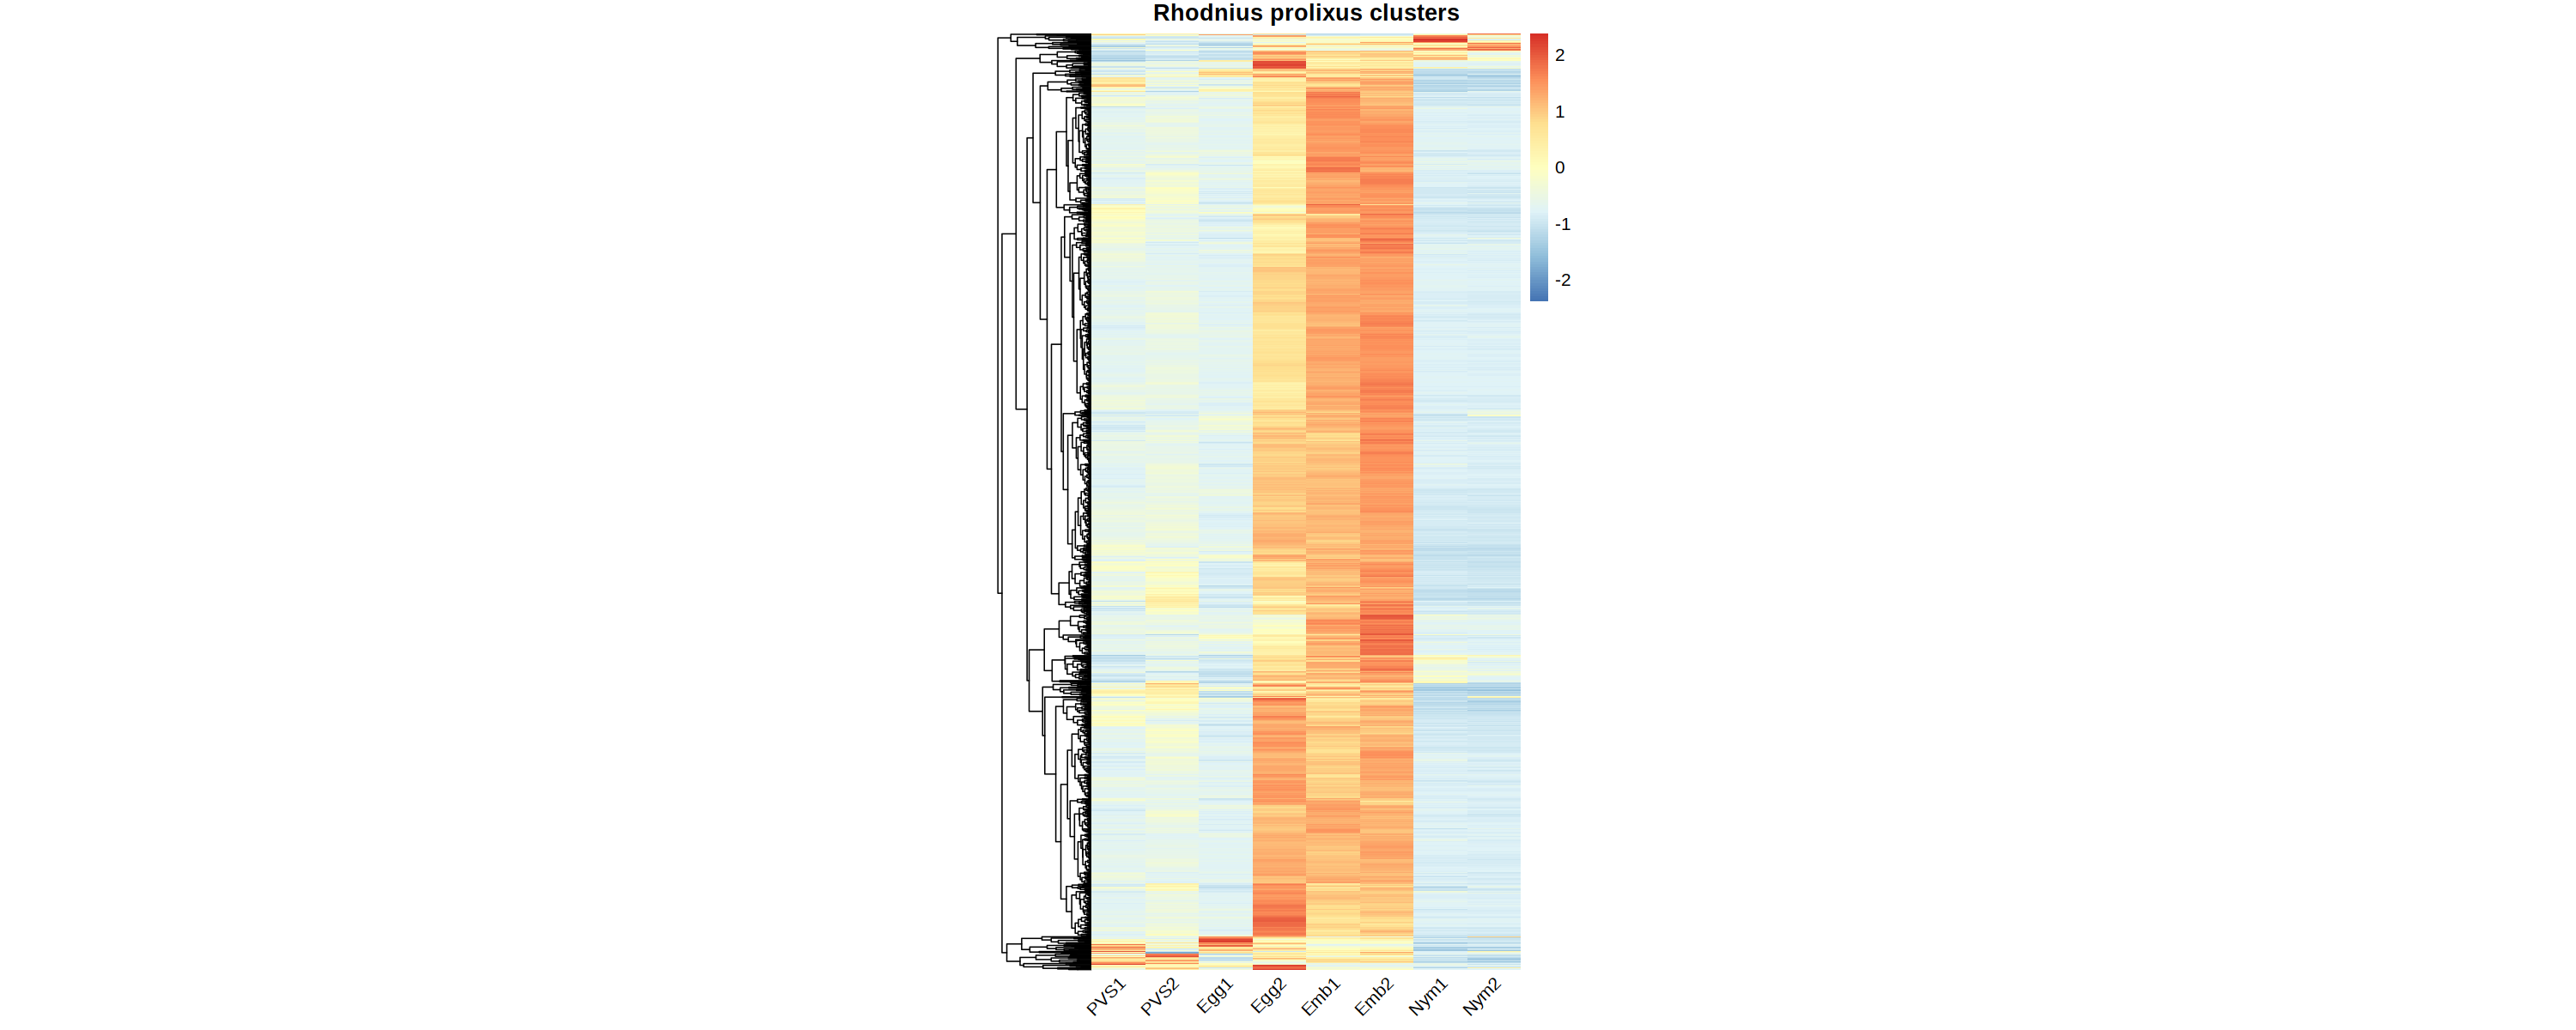

In [14]:
options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 150)

p <- pheatmap(cl_norm_mat,
         main = "Rhodnius prolixus clusters",
         show_rownames = FALSE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         scale = "row",
         cellwidth = 30,
        #  color = plasma(50),
         silent = TRUE,
         # breaks = c(-2,0,2),
         labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)

print(p)
png("images/heatmap_all_clusters.png")
print(p)
dev.off()

png 
  2

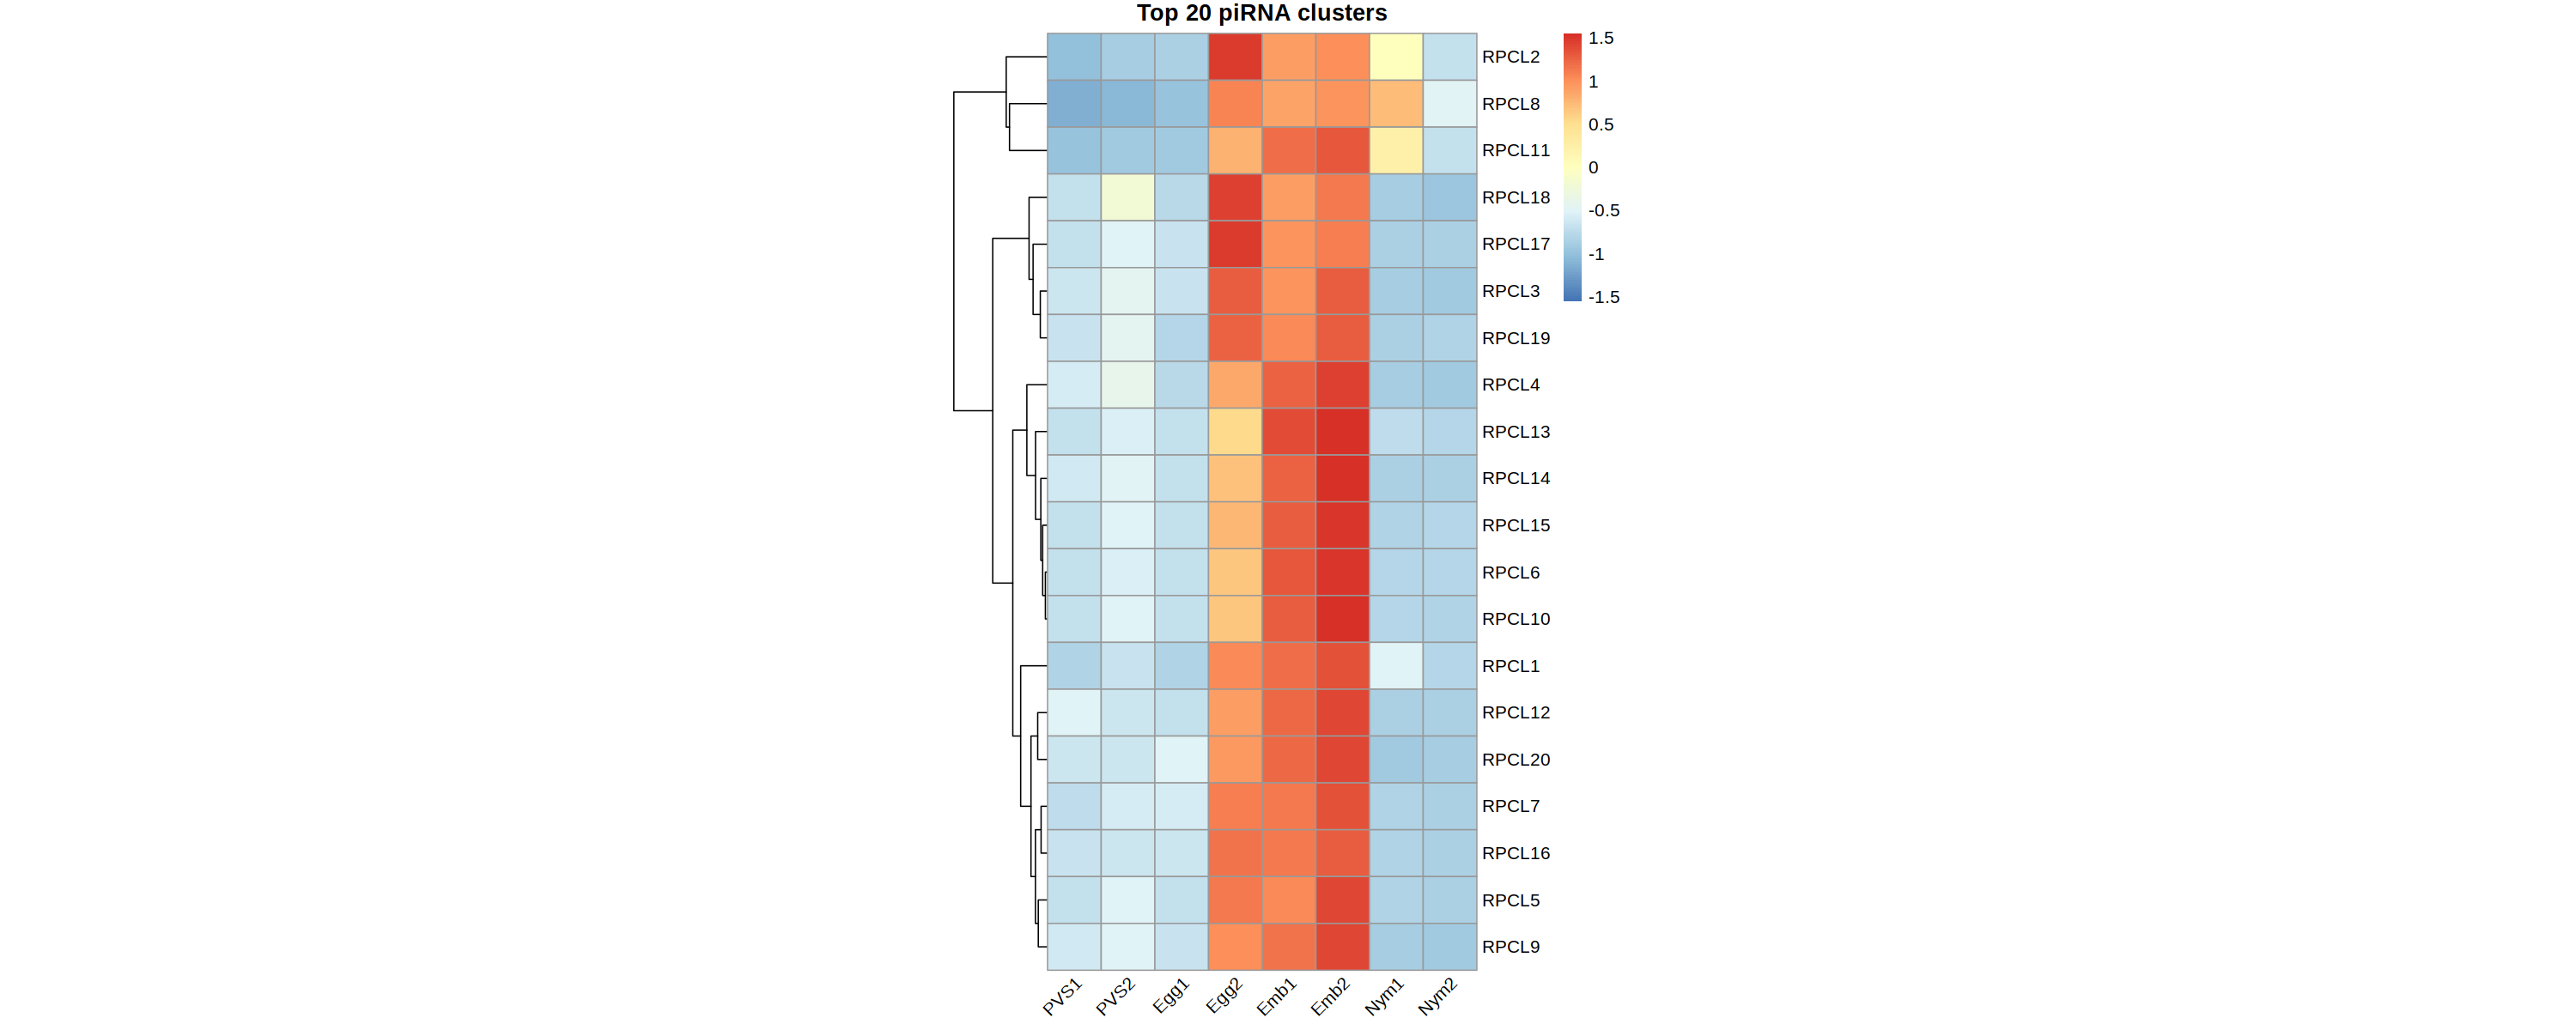

In [15]:
p2 <- pheatmap(cl_norm_mat[c(1:20),],
         main = "Top 20 piRNA clusters",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         scale = "row",
         cellwidth = 30,
        #  color = turbo(50),
         silent = TRUE,
         # breaks = c(-2,0,2),
         labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)
print(p2)
png("images/heatmap_cluster_top20.png")
print(p2)
dev.off()

## Cumulative analysis

In [16]:
samples <- clusters %>% 
    select(pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2) %>% 
    names

clusters_cumulative <- clusters
for (i in samples){   
    cumulative <- 0
    vec_pct <- c()
    sample_values <- clusters[i] %>% pull
    sorted <- sort(sample_values, decreasing=TRUE)
    total <- sum(sample_values)
    for (j in 1:length(sorted)){
        current_value  <- sorted[j]
        cumulative <- cumulative + current_value
        pct <- (cumulative * 100) / total
        vec_pct <- c(vec_pct, pct)
    }
    clusters_cumulative[i] <- vec_pct
}

clusters_cumulative <- clusters_cumulative %>% 
    mutate(num_cluster = seq(1, length(sorted))) %>% 
    pivot_longer(cols = c("pvs1", "pvs2", "egg1", "egg2", "emb1", "emb2", "nym1", "nym2"), 
                 names_to = "sample",
                 values_to = "pct") %>% 
    select(sample, pct, num_cluster)

In [17]:
clusters_cumulative %>% filter(num_cluster == 10)

sample,pct,num_cluster
<chr>,<dbl>,<int>
pvs1,63.25468,10
pvs2,66.19441,10
egg1,69.29750,10
egg2,74.60252,10
emb1,73.99173,10
emb2,73.89421,10
nym1,86.49824,10
nym2,84.09120,10


png 
  2

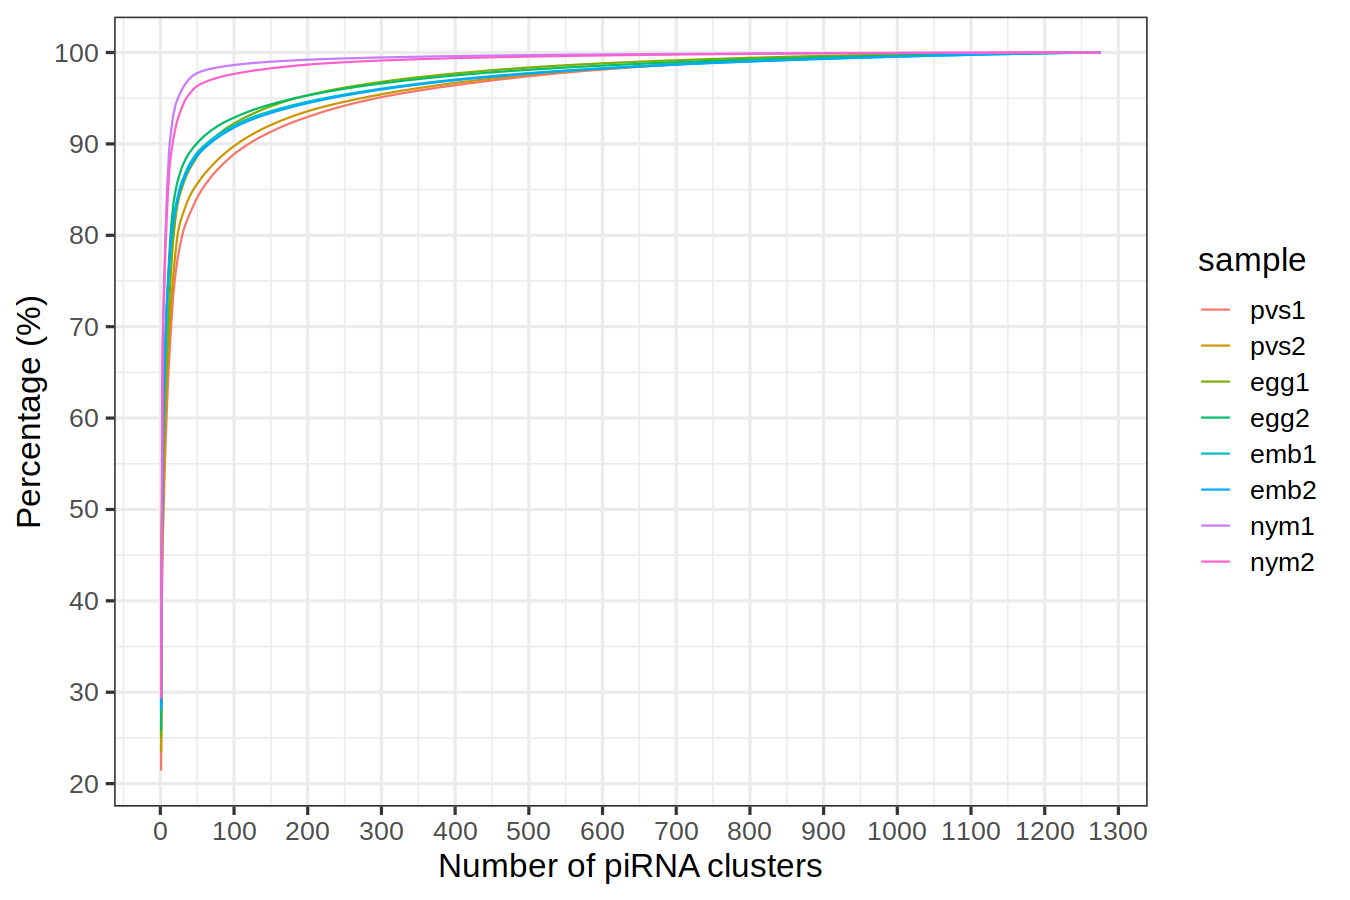

In [18]:
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 150)


clusters_cumulative$sample <- factor(clusters_cumulative$sample, levels = samples)
p3 <- ggplot(clusters_cumulative, aes(num_cluster, pct, color = sample)) +
    geom_line() +
    theme_bw(base_size = 16) +
    scale_y_continuous(breaks = seq(0,100,10)) +
    scale_x_continuous(breaks = seq(0,1800,100)) +
    # scale_x_log10() +
    labs(x = "Number of piRNA clusters", y = "Percentage (%)")
print(p3)
png("images/cumulative_plot.png", width=600, height=400)
print(p3)
dev.off()

png 
  2

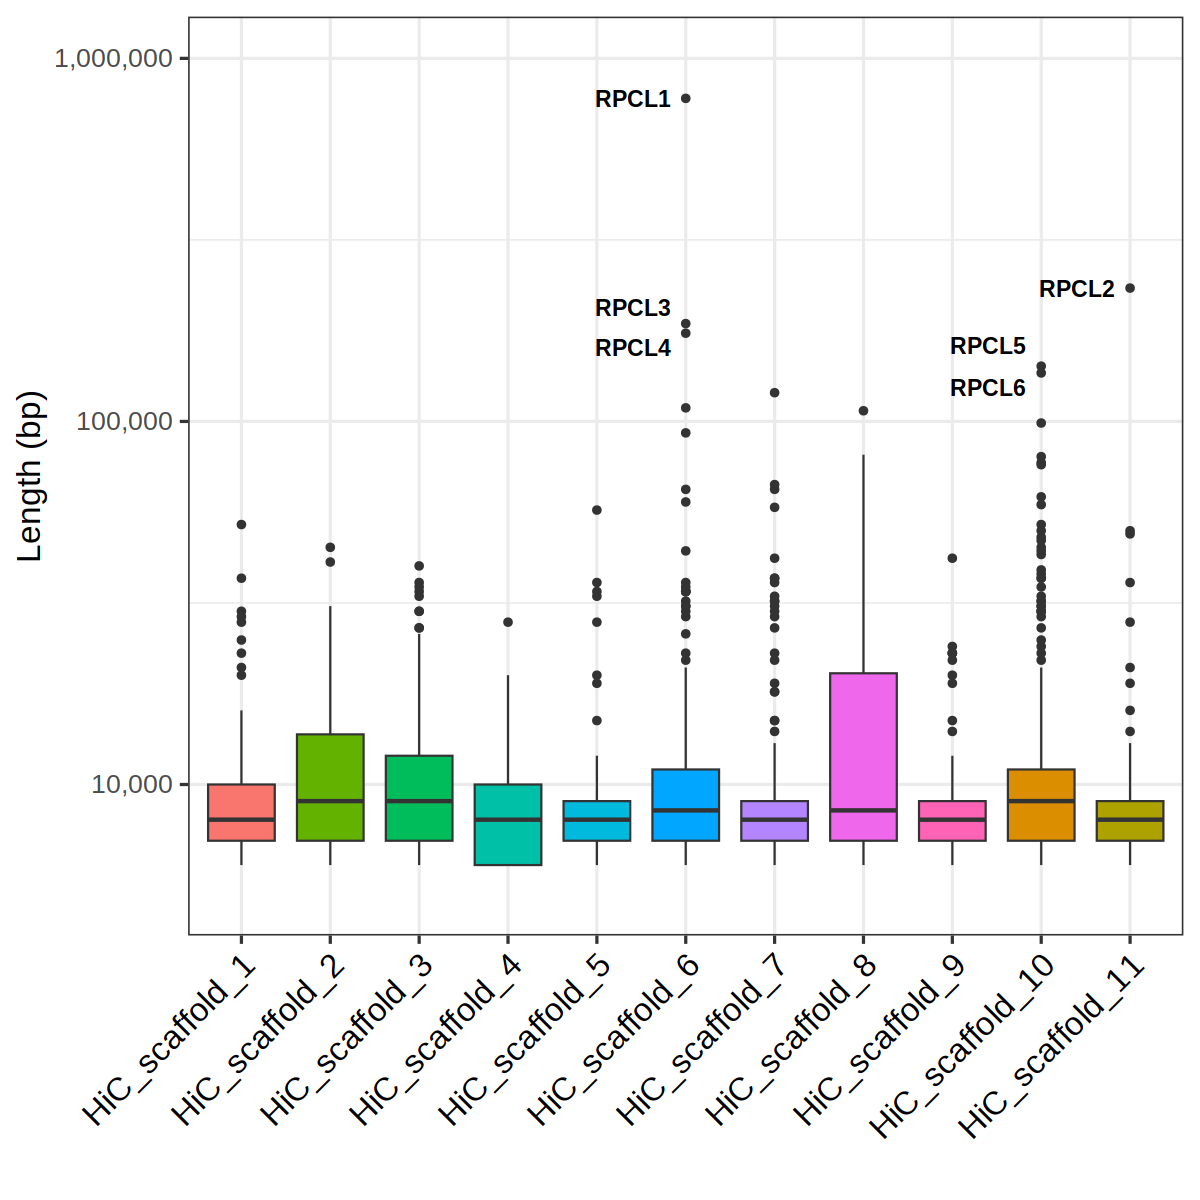

In [19]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)

chrs <- c()
for (i in seq(1,11)){
    chrs <- c(chrs, paste0("HiC_scaffold_", i))
}

chr_mean <- c()
chr_sd <- c()
for (i in chrs){
    lengths <- clusters %>% filter(chr == i) %>% select(length) %>% pull
    stdev <- sd(lengths)
    lmean <- mean(lengths)
    chr_mean <- c(chr_mean, lmean)
    chr_sd <- c(chr_sd, stdev)
}

cl_chr_lens <- data.frame("chr" = chrs, "mean_len" = chr_mean, "sd_len" = chr_sd)

# ggplot(cl_chr_lens, aes(chr, mean_len)) +
#     geom_col() +
#     geom_errorbar(aes(ymax=mean_len+sd_len, ymin=mean_len))

clusters_filt <- clusters %>% 
    filter(chr %in% chrs) %>% 
    rowwise %>% 
    mutate(lengthkb=length/1000) %>% 
    mutate(idx=strsplit(chr, "_")[[1]][3] %>% as.numeric) %>% 
    mutate(pos=case_when(name == "RPCL3" ~ length + 20000,
                         name == "RPCL4" ~ length - 15000,
                         name == "RPCL5" ~ length + 20000,
                         name == "RPCL6" ~ length - 12000,
                         TRUE ~ length))

p5 <- ggplot(clusters_filt, mapping = aes(x = fct_reorder(chr,idx), y = length, fill = chr)) +
    geom_boxplot(show.legend = FALSE) +
    scale_y_log10(labels = scales::comma,
                       limits = c(5000,1000000),
                       breaks = c(10000, 100000, 1000000)) +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=16, color = "black")) +
    xlab("") + ylab("Length (bp)") +
    geom_text(data = clusters_filt %>% filter(length > 130000),
              # check_overlap = TRUE,
              mapping = aes(chr, pos, label = name),
              vjust=0.5, hjust=1.2, show.legend = FALSE, fontface = "bold")
print(p5)
png("images/boxplot_cluster_size_chr.png")
print(p5)
dev.off()

# ggplot(clusters, aes(x = length)) + geom_histogram(bins = 200)

In [20]:
cl_tes <- list()
for (i in clusters_TEs_files){
    path <- str_split(i, "/")[[1]]
    cluster <- str_split(path[length(path)], "\\.")[[1]][1]
    tab <- suppressMessages(read_tsv(i, col_names = c("te", "count"))) %>% 
        mutate(cluster=cluster)
    cl_tes[[cluster]] <- tab
}
cl_tes <- bind_rows(cl_tes)

In [21]:
cl_tes_mat <- cl_tes %>% 
    mutate(idx=str_replace(cluster, "RPCL","") %>% as.numeric) %>% 
    arrange(idx) %>%
    select(-idx) %>% 
    filter(te != "Unknown") %>% 
    pivot_wider(names_from=cluster, values_from=count) %>% 
    column_to_rownames("te")
cl_tes_mat[is.na(cl_tes_mat)] <- 1
cl_tes_mat %>% head

,RPCL1,RPCL2,RPCL3,RPCL4,RPCL5,RPCL6,RPCL7,RPCL8,RPCL9,RPCL10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DNA/hAT-hAT19,6,3,6,1,1,2,2,1,3,1
LINE/L1,1,1,1,1,1,1,1,1,1,1
DNA/TcMar-Tc1,26,18,17,22,8,9,1,6,15,11
LINE,1,1,2,1,1,1,1,1,3,1
LINE/I,26,4,22,15,16,15,7,1,7,22
LINE/L2,1,1,1,1,3,1,1,1,1,1


png 
  2

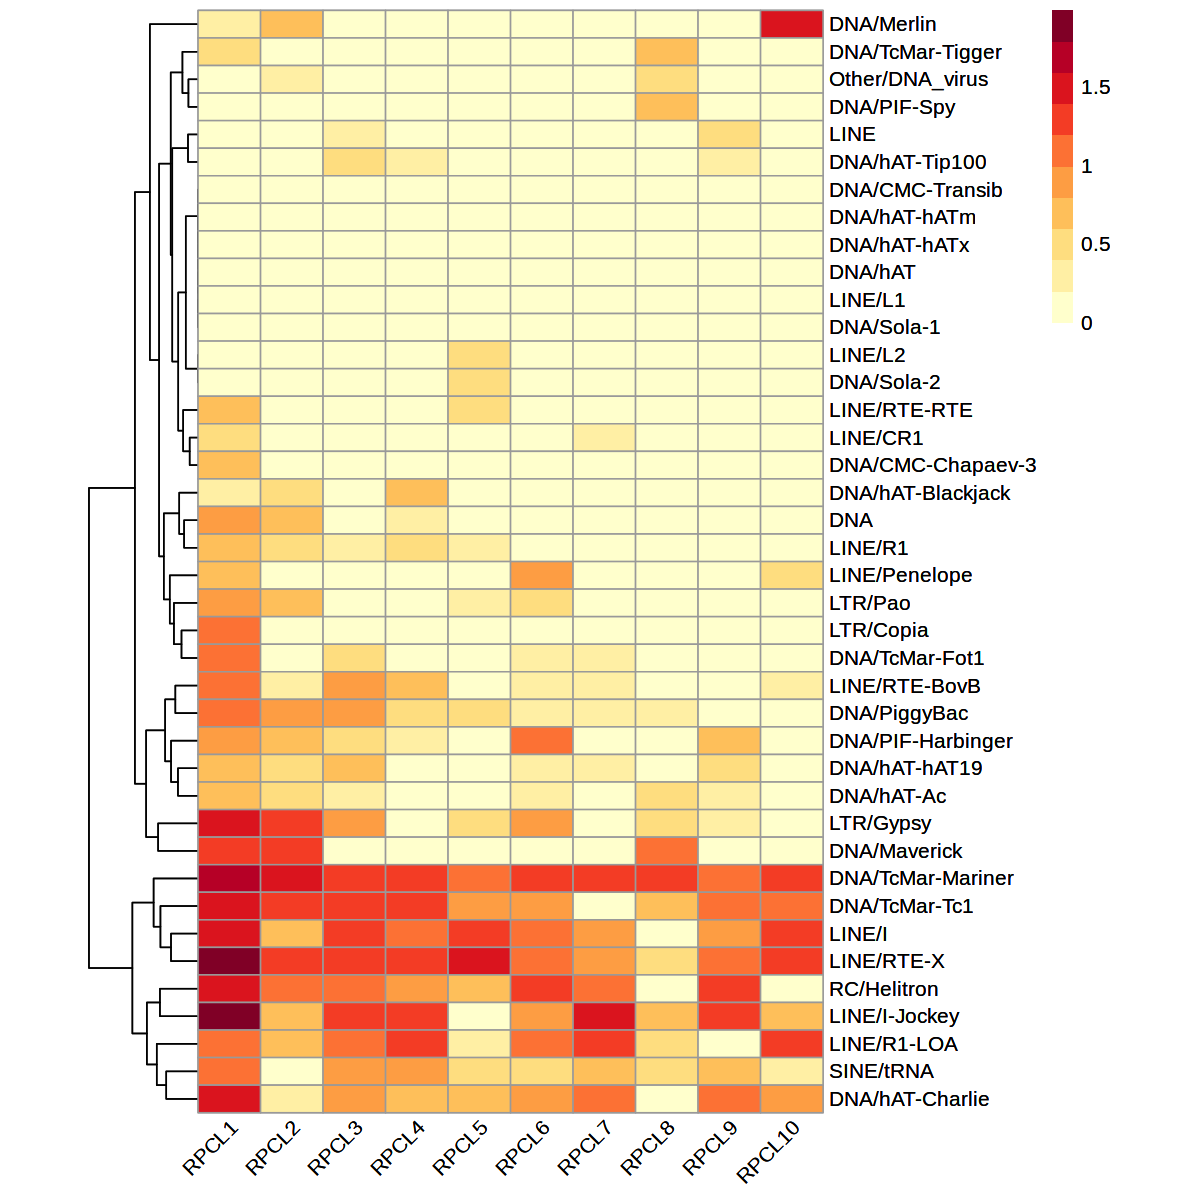

In [22]:
p8 <- pheatmap(cl_tes_mat %>% log10,
         # main = "Top 10 piRNA clusters",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         # scale = "column",
         cellwidth = 30,
         color = colorRampPalette(brewer.pal(9,'YlOrRd'))(10),
         # silent = TRUE,
         # breaks = seq(0, 5, 1),
         # labels_col = c("PVS1", "PVS2", "Egg1", "Egg2", "Emb1", "Emb2", "Nym1", "Nym2"),
         angle_col = 45)
print(p8)
png("images/heatmap_topclusters_TEs.png", height=600, width=800)
print(p8)
dev.off()

png 
  2

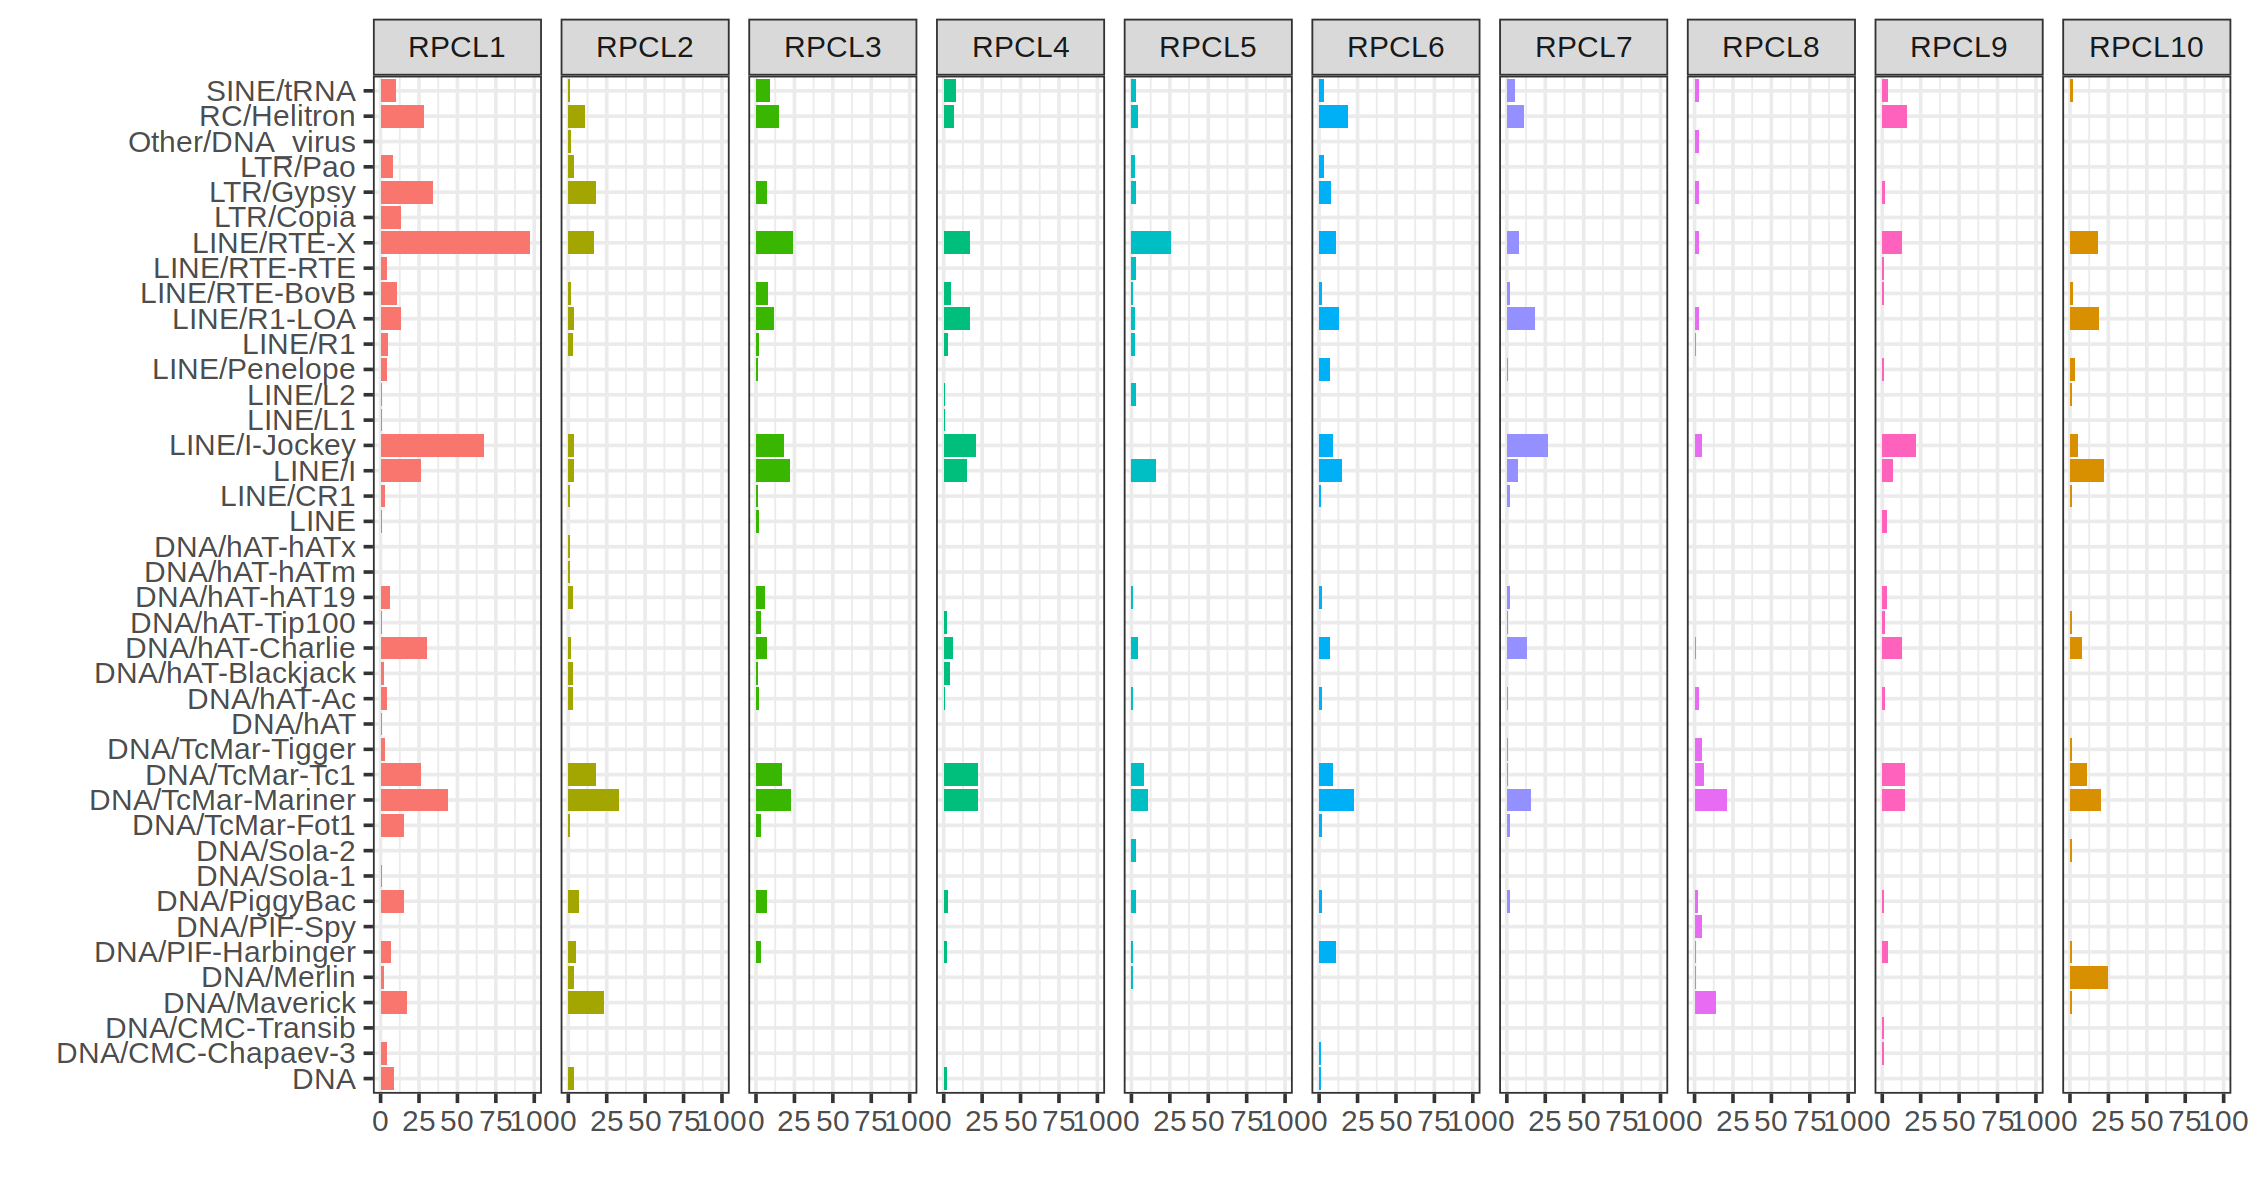

In [23]:
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 150)

cl_tes_ordered <- cl_tes %>% 
    mutate(idx=str_replace(cluster, "RPCL","") %>% as.numeric) %>% 
    arrange(idx)

cl_tes_ordered$cluster <- factor(cl_tes_ordered$cluster)

p10 <- ggplot(cl_tes_ordered %>% filter(te != "Unknown"), aes(count, te, fill = cluster)) + 
    geom_col(show.legend = FALSE) + 
    # scale_x_log10() +
    xlim(0,100) +
    theme_bw(base_size=18) +
    labs(y = "", x = "") +
    # theme(axis.text.x = element_text(angle=45)) +
    facet_grid(cols=vars(fct_reorder(cluster, idx)))
png("images/barplot_te_abundance.png", height = 800, width = 1500)
print(p10)
dev.off()
p10

png 
  2

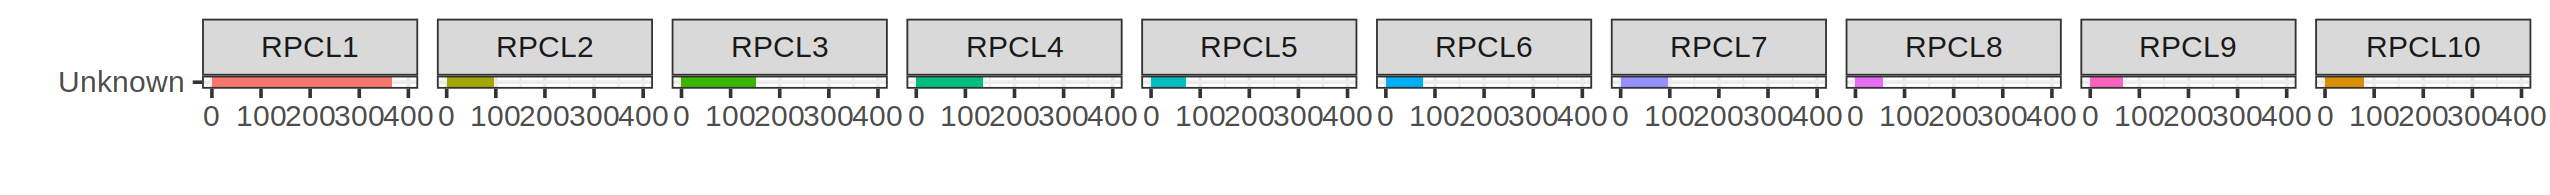

In [24]:
options(repr.plot.width = 17, repr.plot.height = 1.3, repr.plot.res = 150)

p11 <- ggplot(cl_tes_ordered %>% filter(te == "Unknown"), aes(count, te, fill = cluster)) + 
    geom_col(show.legend = FALSE) + 
    # scale_x_log10() +
    xlim(0,400) +
    theme_bw(base_size=18) +
    labs(y = "", x = "") +
    # theme(axis.text.x = element_text(angle=45)) +
    facet_grid(cols=vars(fct_reorder(cluster, idx))) +
png("images/barplot_te_abundance_unknown.png", height = 130, width = 1700)
print(p11)
dev.off()
p11

In [25]:
#basedir <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/"
#overlap_file <- paste0(basedir, "clusters.overlap.tsv")
#outfile <- "plot.png"


overlap_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.overlap.tsv"
# outfile <- snakemake@output[[1]]
overlap <- read_tsv(overlap_file)


overlap_fmt <- as.data.frame(overlap)

samples <- c("pvs1", "pvs2", "egg1", "egg2", "emb1", "emb2", "nym1", "nym2")
for (i in samples){
    overlap_fmt[i] <- as.integer(ifelse(overlap_fmt[i] == 0, 0, 1))
}

overlap_fmt %>% head

Rows: 1276 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): chr
dbl (10): start, end, pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,chr,start,end,pvs1,pvs2,egg1,egg2,emb1,emb2,nym1,nym2
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,HiC_scaffold_1,9434000,9446000,0,0,0,0,1,1,0,0
2,HiC_scaffold_1,10581000,10618000,0,0,0,0,1,1,0,0
3,HiC_scaffold_1,2513000,2543000,1,1,1,1,1,1,1,1
4,HiC_scaffold_1,4892000,4899000,0,0,0,0,1,1,0,0
5,HiC_scaffold_1,5192000,5200000,0,0,0,0,1,1,0,0
6,HiC_scaffold_1,6205000,6218000,0,0,0,0,1,1,0,0


In [26]:
samples

[1] "pvs1" "pvs2" "egg1" "egg2" "emb1" "emb2" "nym1" "nym2"

png 
  2

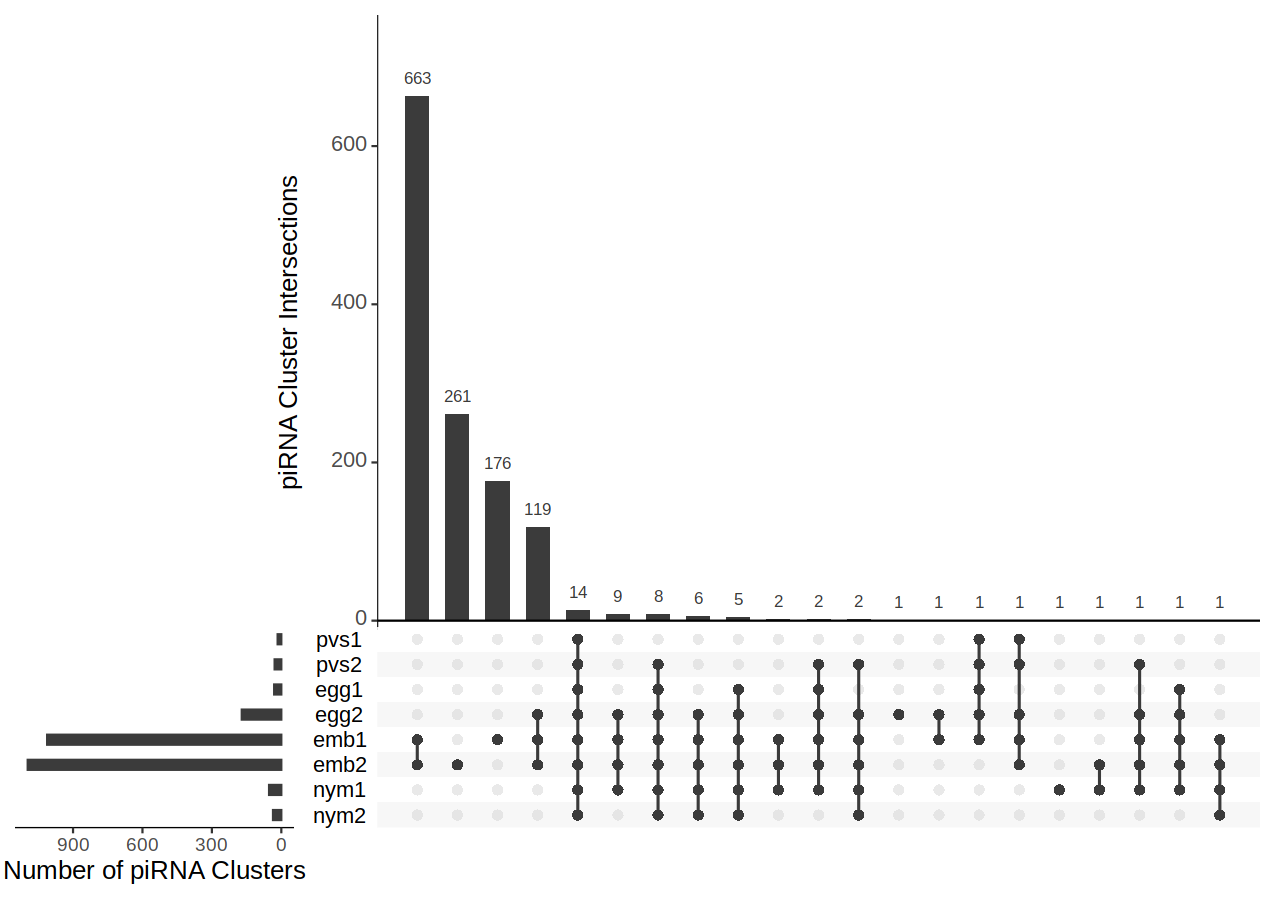

In [27]:
options(repr.plot.width = 8.5, repr.plot.height = 6, repr.plot.res = 150)

up <- upset(overlap_fmt, 
    sets = rev(samples), 
    order.by = "freq",
    keep.order = TRUE,
    sets.x.label = "Number of piRNA Clusters",
    mainbar.y.label = "piRNA Cluster Intersections",
    text.scale = c(1.5, 1.5, 1.5, 1.3, 1.5, 1.3))
up
png("images/upset_clusters.png", width=850, height=600)
print(up)
dev.off()

In [28]:
cluster_pos <- read_tsv(cluster_pos_file)
names(cluster_pos) <- gsub("\'|#|.piRNAs.uniquely.pos.bam", "", names(cluster_pos))
cluster_neg <- read_tsv(cluster_neg_file)
names(cluster_neg) <- gsub("\'|#|.piRNAs.uniquely.neg.bam", "", names(cluster_neg))


Rows: 1276 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): #'chr'
dbl (10): 'start', 'end', 'pvs1.piRNAs.uniquely.pos.bam', 'pvs2.piRNAs.uniqu...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1276 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): #'chr'
dbl (10): 'start', 'end', 'pvs1.piRNAs.uniquely.neg.bam', 'pvs2.piRNAs.uniqu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
samples_pos <- c()
samples_neg <- c()
for (i in samples){
    samples_pos <- c(samples_pos, paste0(i,".pos"))
    samples_neg <- c(samples_neg, paste0(i,".neg"))
}

samples_pos
samples_neg

[1] "pvs1.pos" "pvs2.pos" "egg1.pos" "egg2.pos" "emb1.pos" "emb2.pos" "nym1.pos"
[8] "nym2.pos"

[1] "pvs1.neg" "pvs2.neg" "egg1.neg" "egg2.neg" "emb1.neg" "emb2.neg" "nym1.neg"
[8] "nym2.neg"

In [30]:
clusters_final_pos <- left_join(cluster_pos, clusters_final, by = c("chr", "start", "end"))
clusters_final_posneg <- left_join(clusters_final_pos, cluster_neg, by = c("chr", "start", "end"), suffix = c(".pos", ".neg"))

for(i in samples_neg){
    clusters_final_posneg[i] <- clusters_final_posneg[i] * -1
}

idx <- clusters_final_posneg %>% 
    pivot_longer(cols = all_of(c(samples_pos, samples_neg)), names_to = "sample") %>% 
    group_by(name) %>% 
    summarise(index=sum(value))

positive <- clusters_final_posneg %>% 
    pivot_longer(cols = all_of(c(samples_pos)), names_to = "sample") %>% 
    group_by(name) %>% 
    summarise(total_pos=sum(value))


negative <- clusters_final_posneg %>% 
    pivot_longer(cols = all_of(c(samples_neg)), names_to = "sample") %>% 
    group_by(name) %>% 
    summarise(total_neg=sum(value))

clusters_final_posneg <- clusters_final_posneg %>% 
    left_join(idx, by = "name") %>% 
    left_join(positive, by = "name") %>% 
    left_join(negative, by = "name") %>% 
    mutate(clindex=str_replace(name, "RPCL","") %>% as.numeric) %>% 
    arrange(clindex)

In [31]:
clusters_te_strand <- suppressMessages(read_tsv(cluster_te_strand_file))
clusters_te_strand <- clusters_te_strand %>% 
    mutate(clidx=str_replace(cluster, "RPCL","") %>% as.numeric) %>% 
    arrange(clidx)

png 
  2

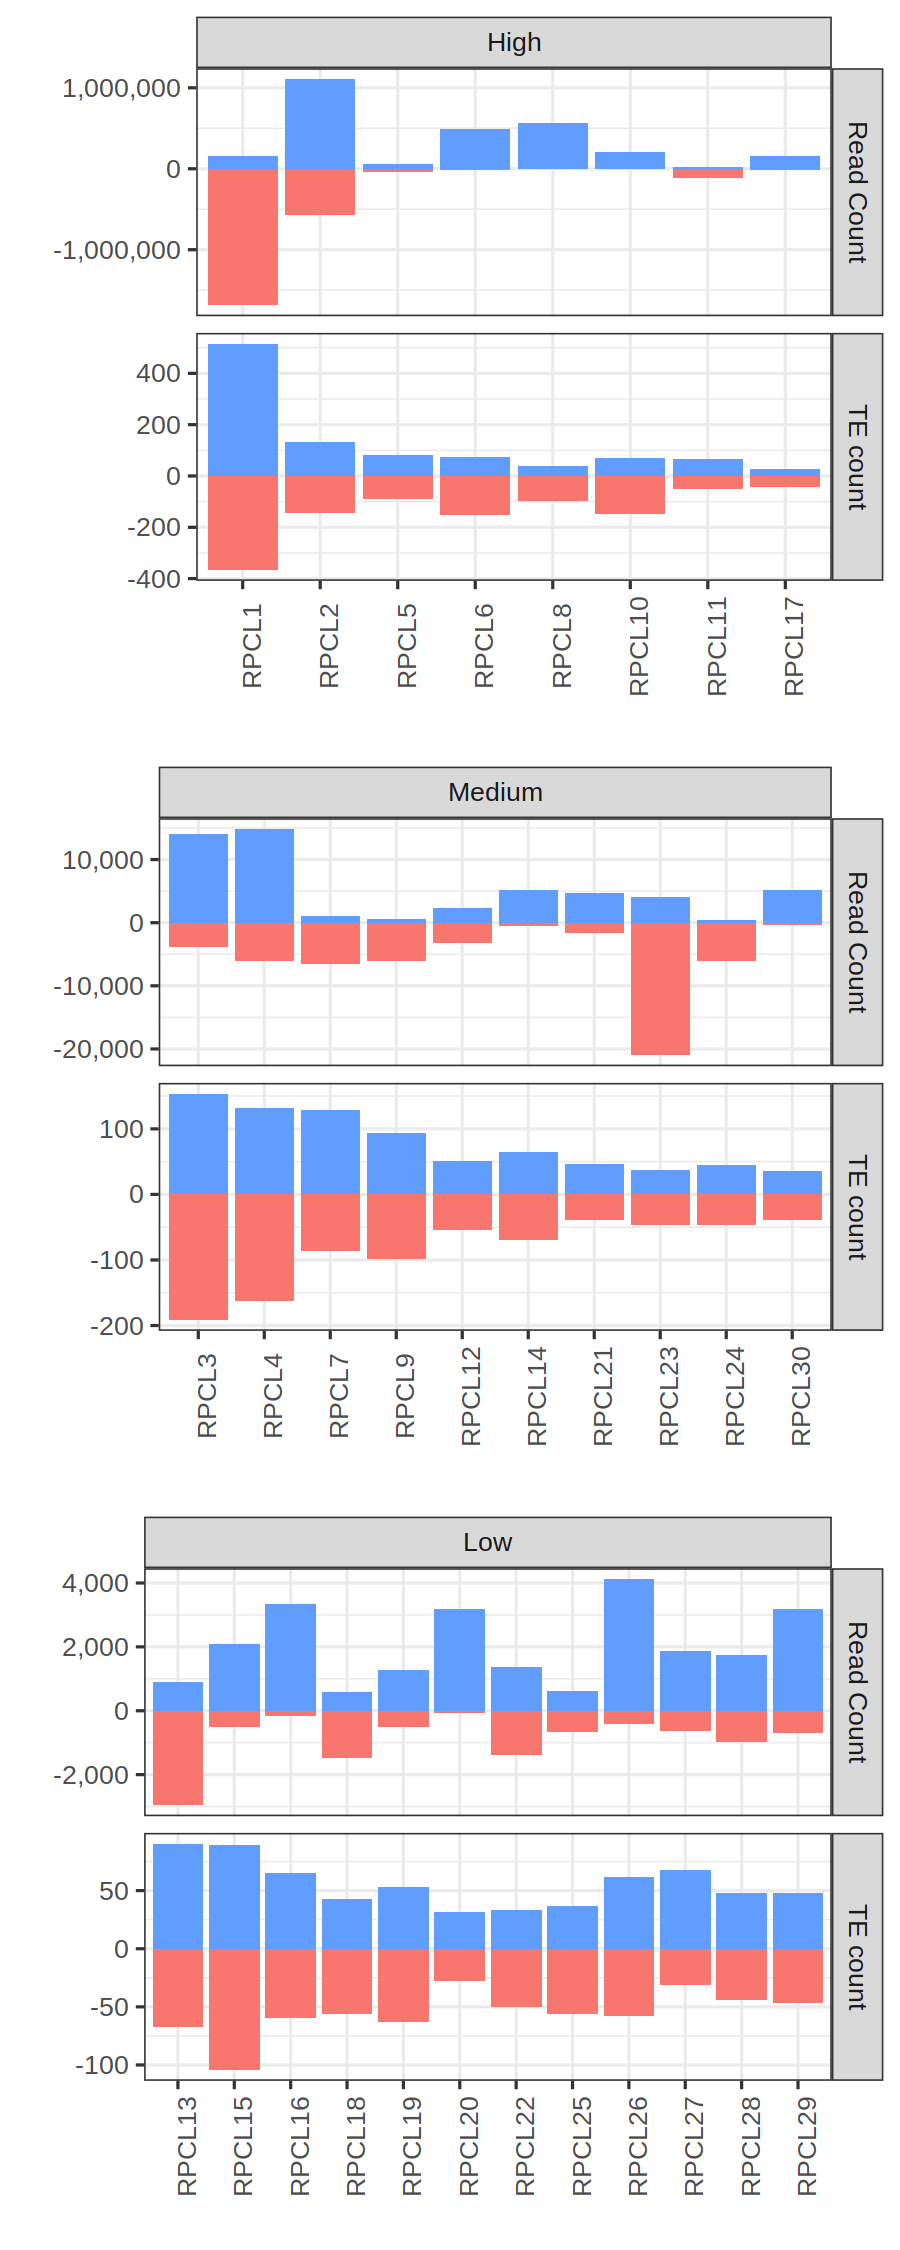

In [32]:
piRNA_strand <- clusters_final_posneg %>% 
    mutate(cluster=name) %>% 
    mutate(pos=total_pos) %>% 
    mutate(neg=total_neg) %>% 
    select(cluster, pos, neg, clindex) %>% 
    mutate(label="Read Count")
te_strand <- clusters_te_strand %>% 
    mutate(label="TE count") %>% 
    mutate(clindex=clidx) %>% 
    select(-clidx)
n <- 30
# piRNA_strand$pos <- log10(piRNA_strand$pos + 1) 
# piRNA_strand$neg <- log10((piRNA_strand$neg * -1) + 1) * -1 
all_strand <- bind_rows(piRNA_strand[c(1:n),], te_strand[c(1:n),])
all_strand <- pivot_longer(all_strand, cols=c("pos", "neg"), names_to = "strand", values_to="count")

bins <- all_strand %>% 
    pivot_wider(names_from = "strand", values_from = "count") %>% 
    group_by(cluster) %>% 
    summarise(total=sum(pos, neg * -1)) %>% 
    mutate(bin=case_when(
        total <= 5000 ~ "Low",
        total > 5000 & total <= 100000 ~ "Medium",
        total > 100000 ~ "High"
    )) %>% 
    select(cluster, bin)

all_strand <- left_join(all_strand, bins, by = "cluster")
all_strand$bin <- factor(all_strand$bin, levels = c("High", "Medium", "Low"))

high <- all_strand %>% filter(bin == "High")
medium <- all_strand %>% filter(bin == "Medium")
low <- all_strand %>% filter(bin == "Low")

options(repr.plot.width = 6, repr.plot.height = 15, repr.plot.res = 150)

colors <- c("#F8766D", "#619CFF")

ph <- ggplot(high, mapping=aes(fct_reorder(cluster, clindex), count, fill = strand)) +
    geom_col(show.legend = FALSE) +
    scale_fill_manual(values = colors) +
    # geom_col(mapping=aes(fct_reorder(cluster, clindex), neg), fill = "#FC717F") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle=90)) +
    # labs(y = "TE count", x = "") +
    scale_y_continuous(label=comma) +
    facet_grid(rows=vars(label), cols = vars(bin), scales = "free") +
    labs(y = "", x = "")

pm <- ggplot(medium, mapping=aes(fct_reorder(cluster, clindex), count, fill = strand)) +
    geom_col(show.legend = FALSE) +
    scale_fill_manual(values = colors) +
    # geom_col(mapping=aes(fct_reorder(cluster, clindex), neg), fill = "#FC717F") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle=90)) +
    # labs(y = "TE count", x = "") +
    scale_y_continuous(label=comma) +
    facet_grid(rows=vars(label), cols = vars(bin), scales = "free") +
    labs(y = "", x = "")

pl <- ggplot(low, mapping=aes(fct_reorder(cluster, clindex), count, fill = strand)) +
    geom_col(show.legend = FALSE) +
    scale_fill_manual(values = colors) +
    # geom_col(mapping=aes(fct_reorder(cluster, clindex), neg), fill = "#FC717F") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle=90)) +
    # labs(y = "TE count", x = "") +
    scale_y_continuous(label=comma) +
    facet_grid(rows=vars(label), cols = vars(bin), scales = "free") +
    labs(y = "", x = "")

grid.arrange(ph, pm, pl, nrow = 3)
png("images/barplot_strand_te_piRNAs.png", width = 1500, height = 600)
grid.arrange(ph, pm, pl, nrow = 3)
dev.off()

Warning message:
"Removed 8608 rows containing missing values (`geom_line()`)."


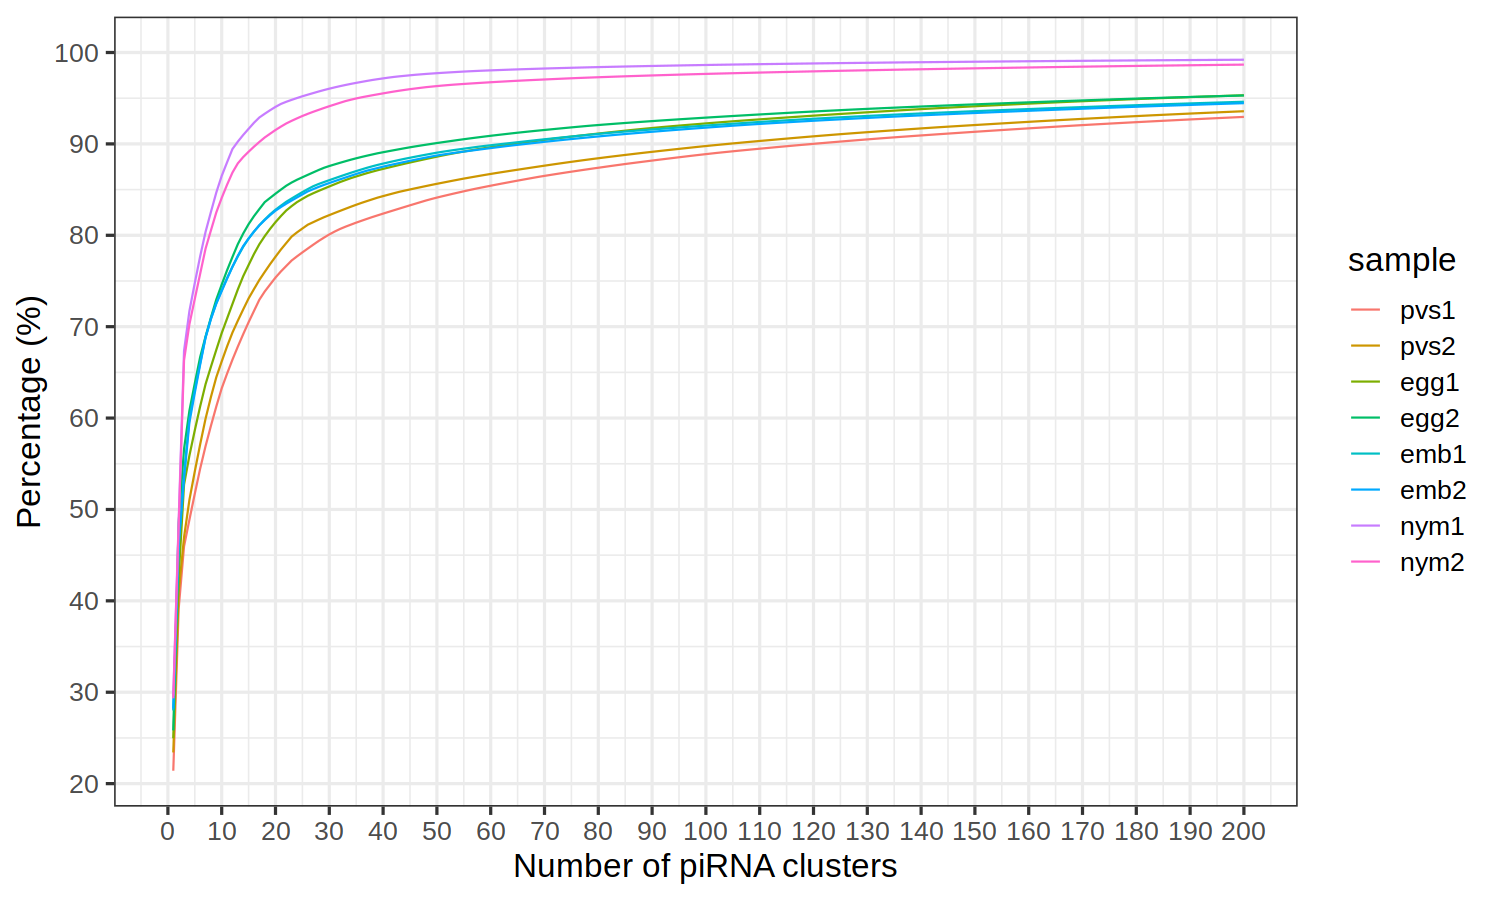

In [33]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 150)


ggplot(clusters_cumulative, aes(num_cluster, pct, color = sample)) +
    geom_line() +
    theme_bw(base_size = 16) +
    scale_y_continuous(breaks = seq(0,100,10)) +
    scale_x_continuous(breaks = seq(0,200,10), limits = c(0,200)) +
    # scale_x_log10() +
    labs(x = "Number of piRNA clusters", y = "Percentage (%)")

In [34]:
clusters_cumulative %>% filter(num_cluster == 10)

sample,pct,num_cluster
<fct>,<dbl>,<int>
pvs1,63.25468,10
pvs2,66.19441,10
egg1,69.29750,10
egg2,74.60252,10
emb1,73.99173,10
emb2,73.89421,10
nym1,86.49824,10
nym2,84.09120,10


In [35]:
pirna_sort <- piRNA_strand  %>% 
    rowwise %>%  
    mutate(ratio = case_when(
        pos == 0 ~ neg, 
        neg == 0 ~ pos, 
        (pos/neg) < 0 ~ (pos/neg) - (pos+neg),
        (pos/neg) > 0 ~ (pos/neg) + (pos+neg),
        )) %>% 
    arrange(desc(ratio)) %>% 
    pivot_longer(cols = c("pos", "neg")) 

pirna_sort$index  <- c(1:nrow(pirna_sort))
pirna_sort <- pirna_sort %>% arrange(clindex)
pirna_sort %>% head

cluster,clindex,label,ratio,name,value,index
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>
RPCL1,1,Read Count,1530415.91,pos,152316,1
RPCL1,1,Read Count,1530415.91,neg,-1682732,2
RPCL2,2,Read Count,-527951.92,pos,1103308,2549
RPCL2,2,Read Count,-527951.92,neg,-575358,2550
RPCL3,3,Read Count,-10187.64,pos,14048,2515
RPCL3,3,Read Count,-10187.64,neg,-3864,2516


png 
  2

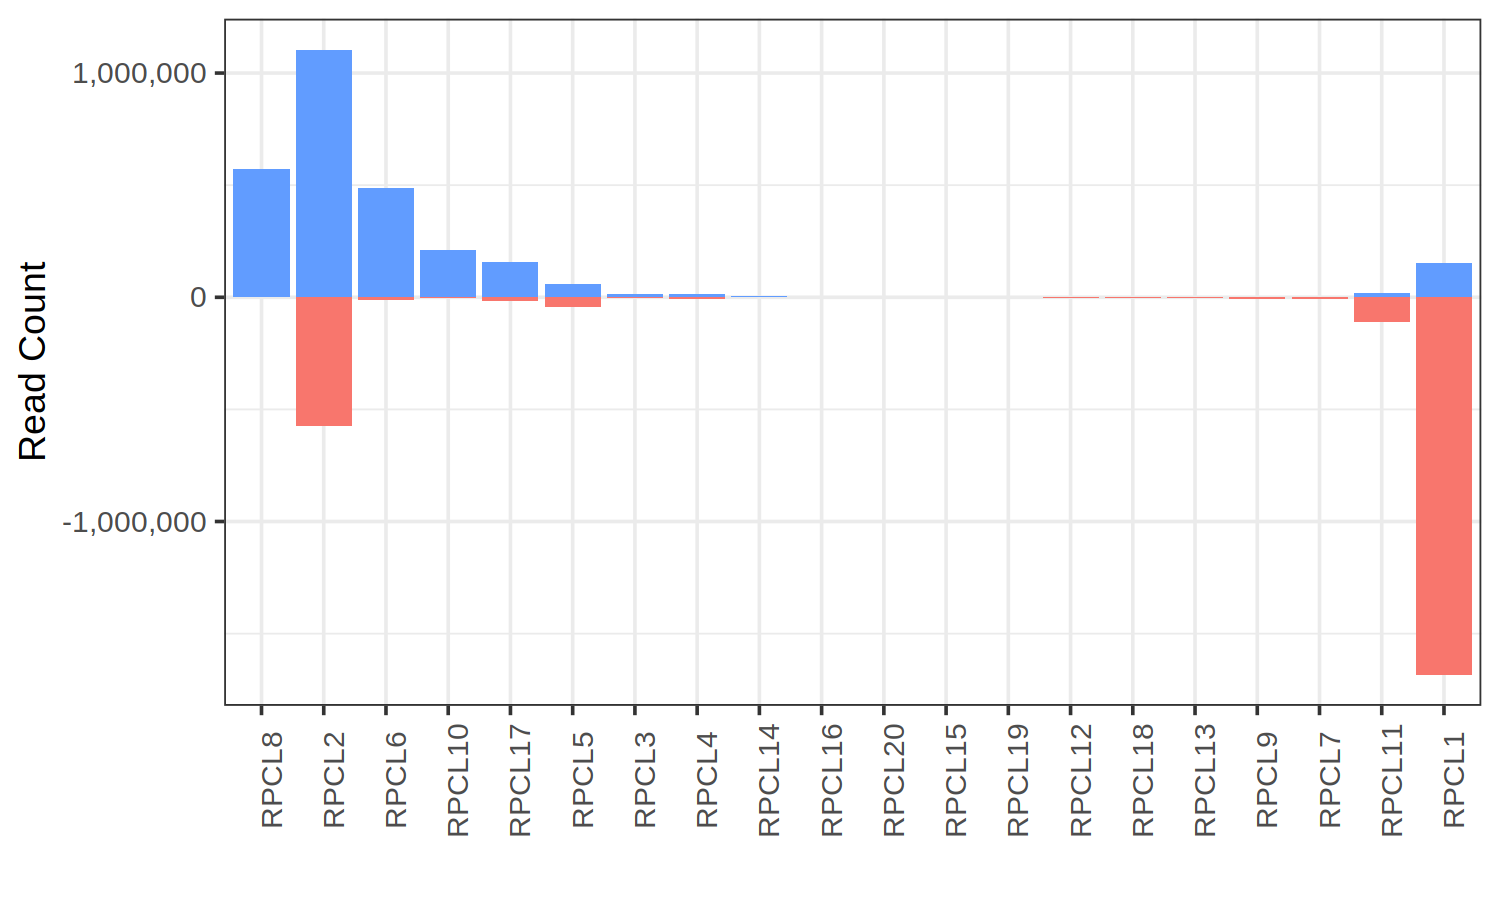

In [36]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 150)


p <- ggplot(pirna_sort %>% arrange(clindex) %>% head(n=40), aes(fct_reorder(cluster, index, .desc = TRUE), value, fill = name)) +
    geom_col(show.legend = FALSE) +
    scale_fill_manual(values = colors) +
    # geom_col(mapping=aes(fct_reorder(cluster, clindex), neg), fill = "#FC717F") +
    theme_bw(base_size = 18) +
    theme(axis.text.x = element_text(angle=90)) +
    # labs(y = "TE count", x = "") +
    scale_y_continuous(label=comma) +
    # facet_grid(rows=vars(label), cols = vars(bin), scales = "free") +
    labs(y = "Read Count", x = "")
p
png("images/strand_bias_piRNAs_top10_clusters.png", width = 1000, height = 600)
p
dev.off()


In [37]:
te_sort <- te_strand  %>% 
    rowwise %>% 
    mutate(ratio = case_when(
        pos == 0 ~ neg, 
        neg == 0 ~ pos, 
        (pos/neg) < 0 ~ (pos/neg) - (pos+neg),
        (pos/neg) > 0 ~ (pos/neg) + (pos+neg),
        )) %>% 
    arrange(clindex) %>% 
    pivot_longer(cols = c("pos", "neg")) 

te_sort$index  <- pirna_sort$index
te_sort %>% head

cluster,label,clindex,ratio,name,value,index
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
RPCL1,TE count,1,-150.40822,pos,514,1
RPCL1,TE count,1,-150.40822,neg,-365,2
RPCL2,TE count,2,13.09655,pos,131,2549
RPCL2,TE count,2,13.09655,neg,-145,2550
RPCL3,TE count,3,37.19895,pos,153,2515
RPCL3,TE count,3,37.19895,neg,-191,2516


png 
  2

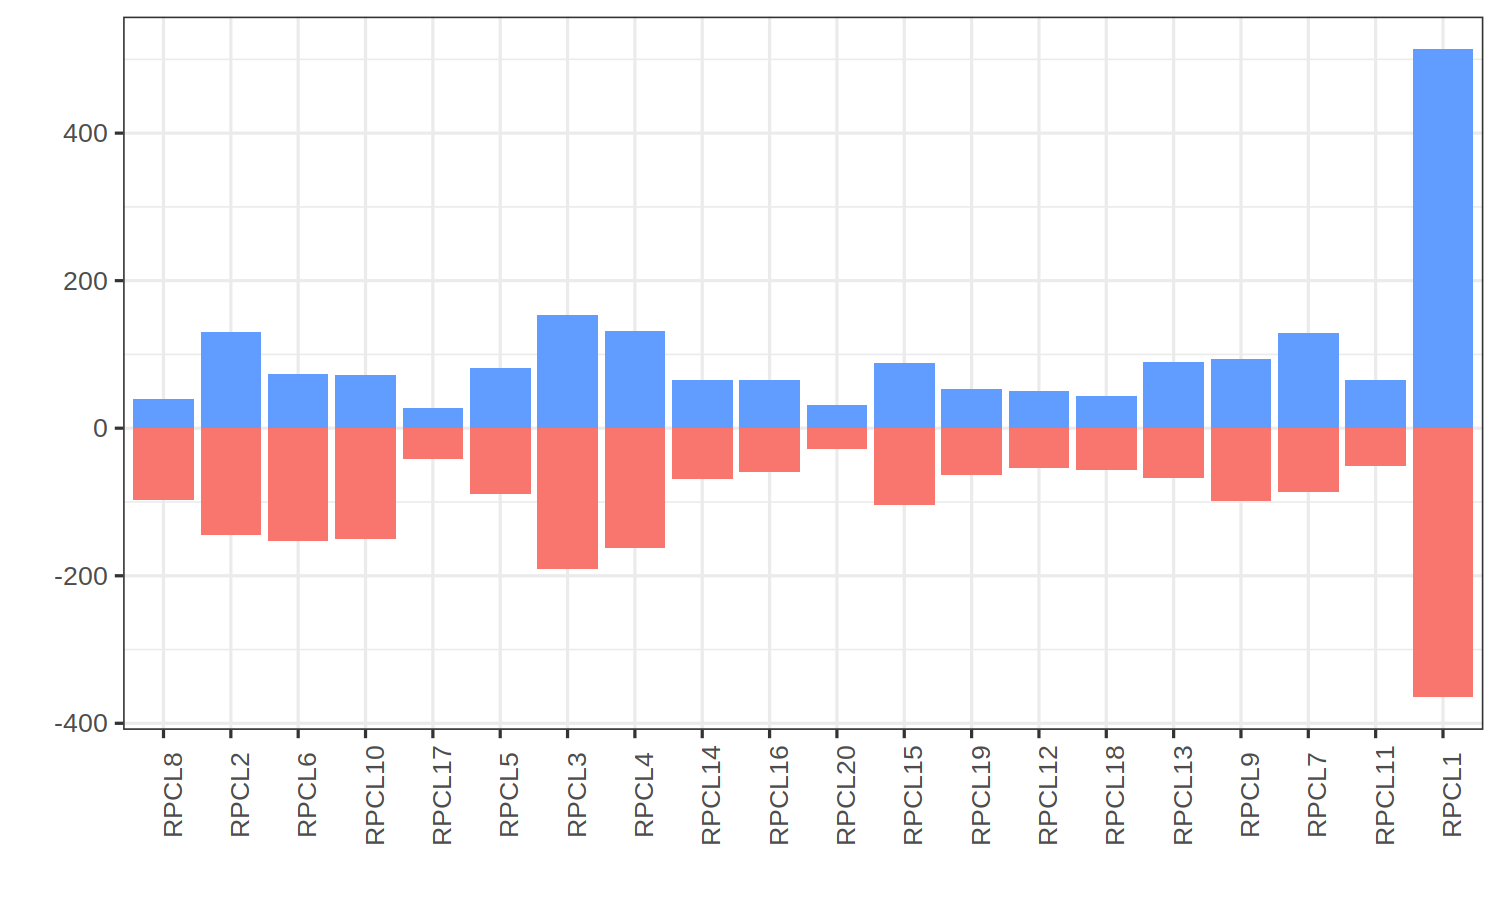

In [38]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 150)


p <- ggplot(te_sort %>% arrange(clindex) %>% head(n=40), aes(fct_reorder(cluster, index, .desc = TRUE), value, fill = name)) +
    geom_col(show.legend = FALSE) +
    scale_fill_manual(values = colors) +
    # geom_col(mapping=aes(fct_reorder(cluster, clindex), neg), fill = "#FC717F") +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle=90)) +
    # labs(y = "TE count", x = "") +
    scale_y_continuous(label=comma) +
    # facet_grid(rows=vars(label), cols = vars(bin), scales = "free") +
    labs(y = "", x = "")

p
png("images/strand_bias_te_top10_clusters.png", width = 1000, height = 600)
p
dev.off()

In [39]:
samples_strand <- clusters_final_posneg %>% names
samples_strand <- samples_strand[grep("pos|neg", samples_strand)]
samples_strand <- samples_strand[grep("total", samples_strand, invert = TRUE)]
samples_strand
head(clusters_final_posneg)

[1] "pvs1.pos" "pvs2.pos" "egg1.pos" "egg2.pos" "emb1.pos" "emb2.pos"
 [7] "nym1.pos" "nym2.pos" "pvs1.neg" "pvs2.neg" "egg1.neg" "egg2.neg"
[13] "emb1.neg" "emb2.neg" "nym1.neg" "nym2.neg"

chr,start,end,pvs1.pos,pvs2.pos,egg1.pos,egg2.pos,emb1.pos,emb2.pos,nym1.pos,⋯,egg1.neg,egg2.neg,emb1.neg,emb2.neg,nym1.neg,nym2.neg,index,total_pos,total_neg,clindex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HiC_scaffold_6,27568000,28344000,347,1410,1478,17722,54727,57605,14727,⋯,-13147,-171083,-629732,-599881,-183941,-67065,-1530416,152316,-1682732,1
HiC_scaffold_11,26455000,26688000,3468,8968,15587,124603,335860,321931,210371,⋯,-11970,-68975,-184270,-161061,-98014,-39886,527950,1103308,-575358,2
HiC_scaffold_6,36293000,36479000,38,177,177,1905,5419,5923,299,⋯,-60,-537,-1542,-1538,-57,-31,10184,14048,-3864,3
HiC_scaffold_6,30741000,30916000,64,122,121,1291,6678,6249,178,⋯,-39,-825,-2455,-2556,-47,-26,8667,14771,-6104,4
HiC_scaffold_10,19165000,19307000,541,1817,1391,7464,24098,22974,461,⋯,-382,-6577,-16661,-16908,-288,-96,17486,58900,-41414,5
HiC_scaffold_10,21613000,21749000,790,3384,3445,48871,217965,208764,3071,⋯,-92,-931,-4596,-4095,-92,-41,477402,487469,-10067,6


In [40]:
scalling_factors_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/bamCoverage_dir/scallingFactors.tsv"

scale_factors <- suppressMessages(read_tsv(scalling_factors_file))

normalize_counts <- function(mat){
    norm <- mat
    norm_log <- mat
    for(i in 1:length(scale_factors$sample)){
        sample_pos <- str_c(scale_factors$sample[i], ".pos") 
        sample_neg <- str_c(scale_factors$sample[i], ".neg") 
        sf <- as.numeric(scale_factors[i,2])
        # print(clusters[sample])
        snorm_pos <- sapply(norm[sample_pos], function(x) {x * sf})
        snorm_neg <- sapply(norm[sample_neg], function(x) {(x * sf) * -1})
        snorm_log_pos <- sapply(norm[sample_pos], function(x) {log10((x * sf) + 1)})
        snorm_log_neg <- sapply(norm[sample_neg], function(x) {log10((x * sf * -1) + 1)})
        norm[sample_pos] <- snorm_pos
        norm[sample_neg] <- snorm_neg
        norm_log[sample_pos] <- snorm_log_pos
        norm_log[sample_neg] <- snorm_log_neg
    }
    list("norm"=norm, "norm_log"=norm_log)
}


In [41]:
final_posneg_norm <- normalize_counts(clusters_final_posneg)
final_posneg_norm$norm %>% head

chr,start,end,pvs1.pos,pvs2.pos,egg1.pos,egg2.pos,emb1.pos,emb2.pos,nym1.pos,⋯,egg1.neg,egg2.neg,emb1.neg,emb2.neg,nym1.neg,nym2.neg,index,total_pos,total_neg,clindex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HiC_scaffold_6,27568000,28344000,93.39041,162.51144,160.31233,1737.1584,1622.8899,1931.9488,505.123936,⋯,1425.998777,16770.01854,18674.25018,20118.72874,6309.024377,2766.093994,-1530416,152316,-1682732,1
HiC_scaffold_11,26455000,26688000,933.36581,1033.61889,1690.65513,12213.9232,9959.6871,10796.8788,7215.551547,⋯,1298.334628,6761.11612,5464.39450,5401.64228,3361.799247,1645.096922,527950,1103308,-575358,2
HiC_scaffold_6,36293000,36479000,10.22719,20.40037,19.19843,186.7333,160.6966,198.6448,10.255453,⋯,6.507943,52.63819,45.72690,51.58124,1.955053,1.278594,10184,14048,-3864,3
HiC_scaffold_6,30741000,30916000,17.22474,14.06127,13.12435,126.5473,198.0313,209.5781,6.105253,⋯,4.230163,80.86873,72.80126,85.72279,1.612061,1.072369,8667,14771,-6104,4
HiC_scaffold_10,19165000,19307000,145.60291,209.42078,150.87581,731.6415,714.6089,770.4989,15.811919,⋯,41.433904,644.69533,494.06999,567.05824,9.878162,3.959517,17486,58900,-41414,5
HiC_scaffold_10,21613000,21749000,212.61793,390.02747,373.66439,4790.4676,6463.5955,7001.4991,105.332764,⋯,9.978846,91.25914,136.29108,137.33756,3.155524,1.691044,477402,487469,-10067,6


In [42]:
samples_pos <- samples_strand[(grep("pos", samples_strand))]
clp_norm <- final_posneg_norm$norm %>% select(name, all_of(samples_pos)) %>% column_to_rownames("name")
clp_log <- final_posneg_norm$norm_log %>% select(name, all_of(samples_pos)) %>% column_to_rownames("name")
names(clp_norm) <- str_replace(names(clp_norm), ".pos", "")
names(clp_log) <- str_replace(names(clp_log), ".pos", "")

samples_neg <- samples_strand[(grep("neg", samples_strand))]
cln_norm <- final_posneg_norm$norm %>% select(name, all_of(samples_neg)) %>% column_to_rownames("name")
cln_log <- final_posneg_norm$norm_log %>% select(name, all_of(samples_neg)) %>% column_to_rownames("name")
names(cln_norm) <- str_replace(names(clp_norm), ".neg", "")
names(cln_log) <- str_replace(names(clp_log), ".neg", "")


png 
  2

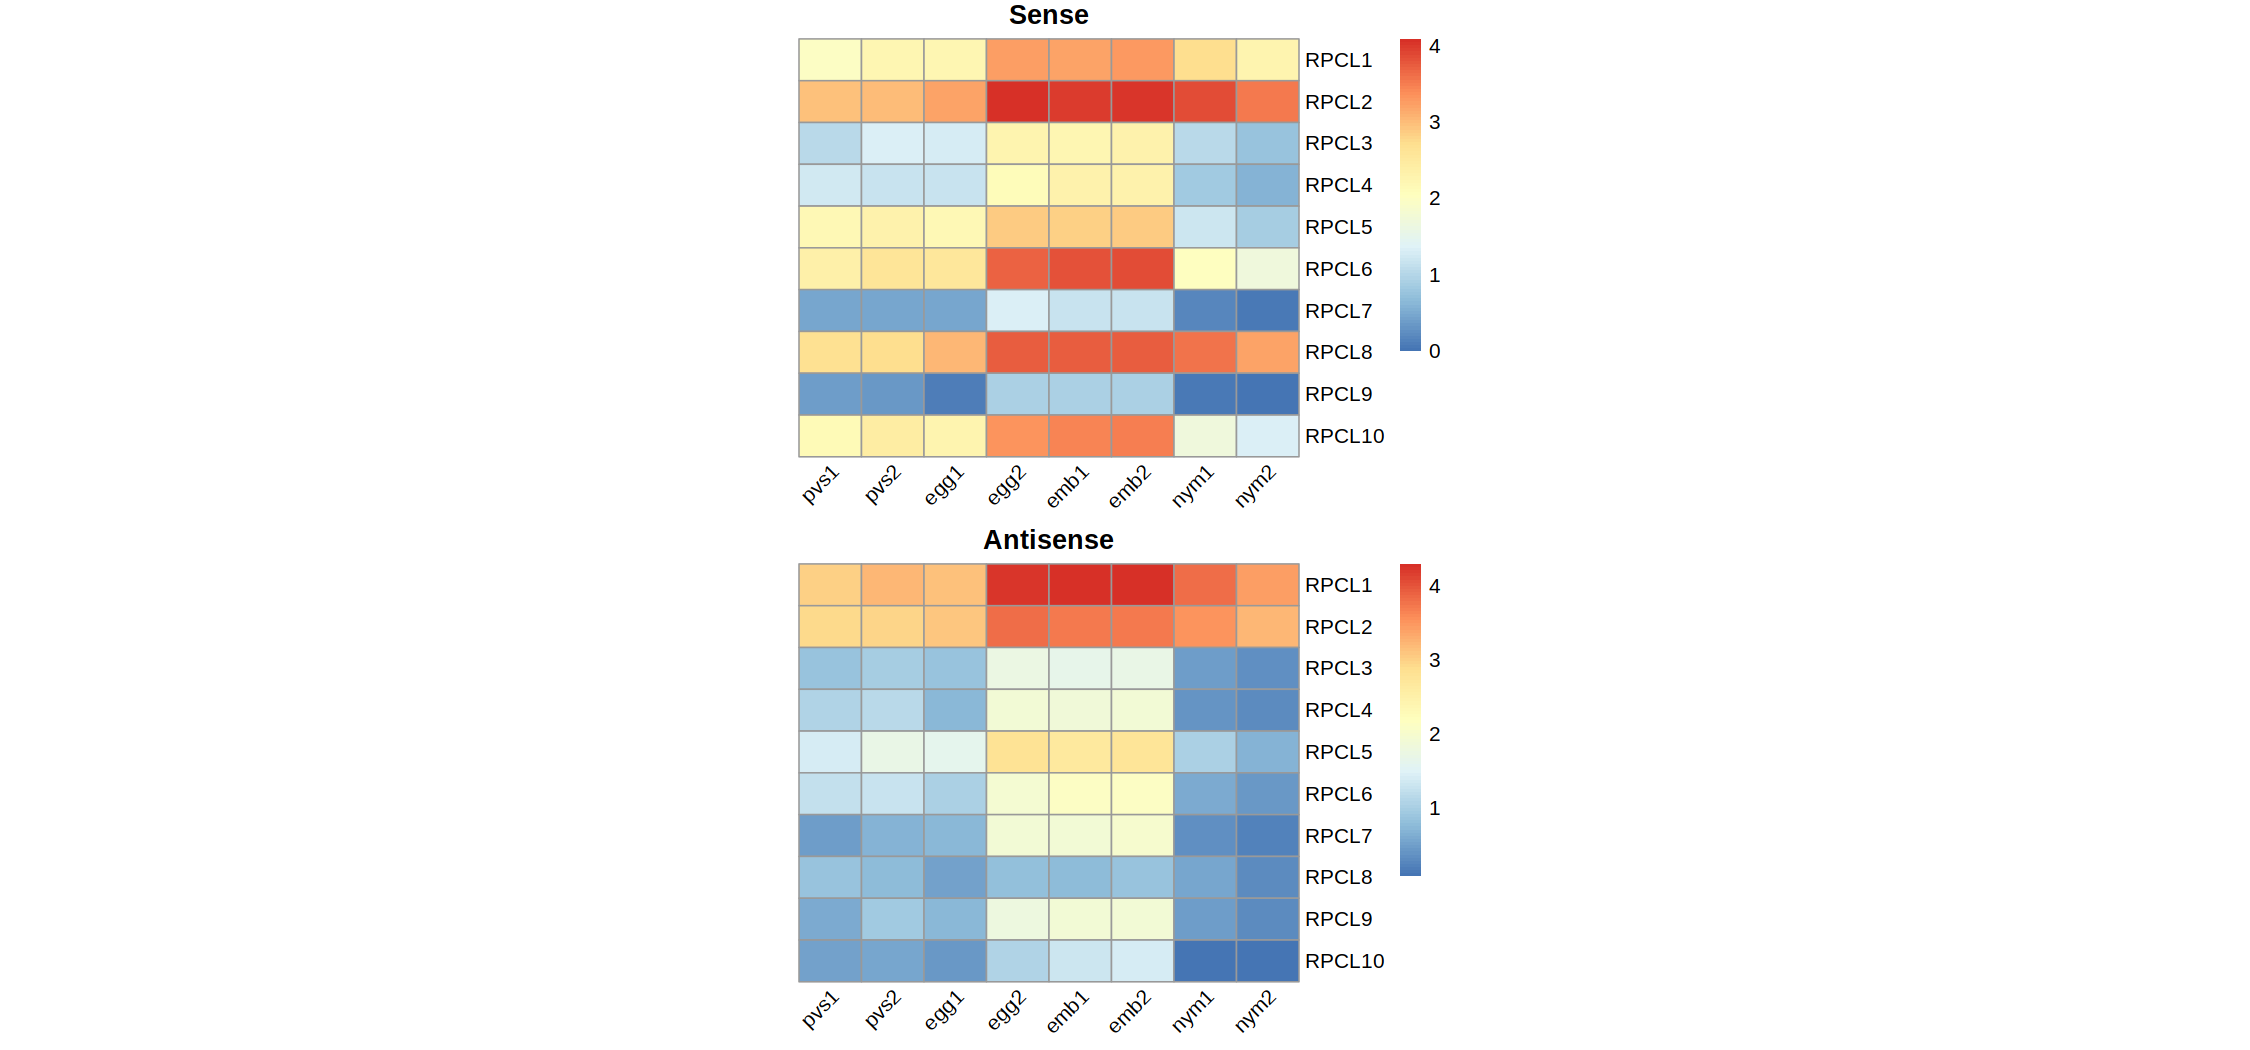

In [43]:
p_clp <- pheatmap(clp_log %>% head(n=10),
         main = "Sense",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         # scale = "row",
         cellwidth = 30,
        #  color = colorRampPalette(c("white", brewer.pal(9,'YlOrRd')))(100),
         # color = palette(100) %>% rev,
         # color = plasma(50),
         silent = TRUE,
         # breaks = c(-2,0,2),
         # labels_col = c("GO_WT", "GO_KO", "GV_WT", "GV_KO"),
         angle_col = 45)

p_cln <- pheatmap(cln_log %>% head(n=10),
         main = "Antisense",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         # scale = "row",
         cellwidth = 30,
        #  color = colorRampPalette(c("white", brewer.pal(9,'YlOrRd')))(100),
         # color = palette(100) %>% rev,
        #  color = plasma(50),
         silent = TRUE,
        #  breaks = c(0:5),
         # labels_col = c("GO_WT", "GO_KO", "GV_WT", "GV_KO"),
         angle_col = 45)

options(repr.plot.width = 15, repr.plot.height = 7, repr.plot.res = 150)

grid.arrange(p_clp[[4]], p_cln[[4]], ncol=1, nrow = 2)


png("images/heatmap_clusters_sense_antisense.png", height=700, width=1500)
grid.arrange(p_clp[[4]], p_cln[[4]], ncol=1, nrow = 2)
dev.off()

In [58]:
# names(final_posneg_norm$norm)

# mean_sf <- mean(scale_factors$scallingFactors)
sample <- c("pvs1", "pvs2", "egg1", "egg2", "emb1", "emb2", "nym1", "nym2")

cluster_rpm_final <- final_posneg_norm$norm %>% 
    rowwise() %>% 
    mutate(sense_rpm=mean(str_c(sample, ".pos")),
           antisense_rpm=mean(str_c(sample, ".neg"))
           total_rpm=sum(sense_rpm, antisense_rpm) / length(sample) ) %>% 
    select(name, length, mean_rpm, total_rpm, sense_rpm, antisense_rpm, chr, start, end)

ERROR: Error in parse(text = x, srcfile = src): <text>:10:12: unexpected symbol
9:            antisense_rpm=mean(str_c(sample, ".neg"))
10:            total_rpm
               ^


[1] "pvs1.pos" "pvs2.pos" "egg1.pos" "egg2.pos" "emb1.pos" "emb2.pos" "nym1.pos"
[8] "nym2.pos"

In [45]:
cl_tes_outtable <- cl_tes_ordered %>% select(-idx) %>% pivot_wider(names_from=cluster, values_from=count)
cl_tes_outtable[is.na(cl_tes_outtable)] <- 0
cl_tes_outtable %>% head

te,RPCL1,RPCL2,RPCL3,RPCL4,RPCL5,RPCL6,RPCL7,RPCL8,RPCL9,RPCL10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DNA/hAT-hAT19,6,3,6,0,1,2,2,0,3,0
LINE/L1,1,0,0,1,0,0,0,0,0,0
DNA/TcMar-Tc1,26,18,17,22,8,9,1,6,15,11
LINE,1,0,2,0,0,0,0,0,3,0
LINE/I,26,4,22,15,16,15,7,0,7,22
LINE/L2,1,0,0,1,3,0,0,0,0,1


In [46]:
clusters_outtable <- clusters_final_posneg %>% 
    select(name, name, length, total_pos, total_neg, chr, start, end) %>% 
    rowwise %>% 
    mutate(total=total_pos-total_neg) %>% 
    select(name, name, length, total, total_pos, total_neg, chr, start, end)

In [52]:
cluster_cumulative_outtable <- clusters_cumulative %>% 
    pivot_wider(names_from=sample, values_from=pct) %>% 
    rowwise %>% 
    mutate(mean = mean(c(pvs1, pvs2, egg1, egg2, emb1, emb2, nym1, nym2)))

## Output tables

In [48]:
write_tsv(clusters_outtable, "tables/cluster_final_final.tsv")

In [49]:
write_tsv(cl_tes_outtable, "tables/cluster_TE.tsv")

In [53]:
write_tsv(cluster_cumulative_outtable, "tables/cluster_cumulative.tsv")